# GLOBAL POWER PLANT DATABASE 

### According to problem statement there are two target variables which are : primary_fuel and capacity_mw. So we need to make two models in which primary_fuel is a classification problem and capacity_mw is a regression problem. We will make two model and in that 1st primary_fuel is target variable and capacity_mw will drop and when we make 2nd model capacity_mw is a target variable and primary_fuel will be drop.

# MODEL 1 : primary_fuel is a target variable

## Importing Libreries

In [365]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [366]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Importing the dataset and see all columns with first five rows.

## Drop  capacity_mw column to make model 1 with primary_fuel is target variable

In [367]:
#drop capacity_mw column to make model 1
df=df.drop(['capacity_mw'], axis=1)

## Shape of data with number of rows and columns

In [368]:
df.shape

(908, 24)

There are 908 Rows and 24 Columns in dataset

## Detailed description

In [369]:
df.describe()

,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns

In [370]:
#check the data types of all the columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We have Float data type ----> latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh.

object datatypes ----> country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

all are independent variable accept primary_fuel. primary_fuel are target variable.

## Checking is there any null value in dataset

In [371]:
#check is there any null value present in any column

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are so many missing values in whole dataset. so we need to treat that and fill missing value.

## Visualization of null values

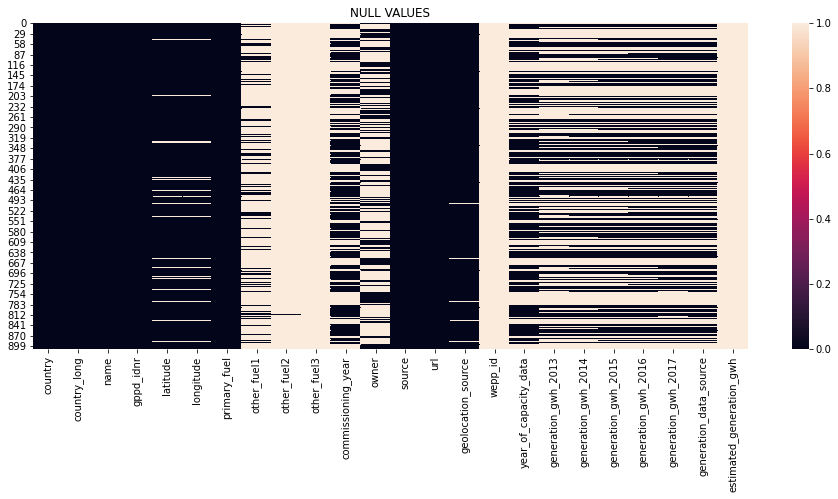

In [372]:
plt.figure(figsize=[16,6])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

As shown in plot the white line shows Null values in data set.

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   latitude                  862 non-null    float64
 5   longitude                 862 non-null    float64
 6   primary_fuel              908 non-null    object 
 7   other_fuel1               199 non-null    object 
 8   other_fuel2               1 non-null      object 
 9   other_fuel3               0 non-null      float64
 10  commissioning_year        528 non-null    float64
 11  owner                     342 non-null    object 
 12  source                    908 non-null    object 
 13  url                       908 non-null    object 
 14  geolocatio

We can see the complete information about data frame

#### check target variable and encode that to visualize data

In [374]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [375]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [376]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [377]:
df["primary_fuel"] = le.fit_transform(df["primary_fuel"].values.reshape(-1,1))

In [378]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

### Analysis through distplot

In [379]:
fe = df[['primary_fuel', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

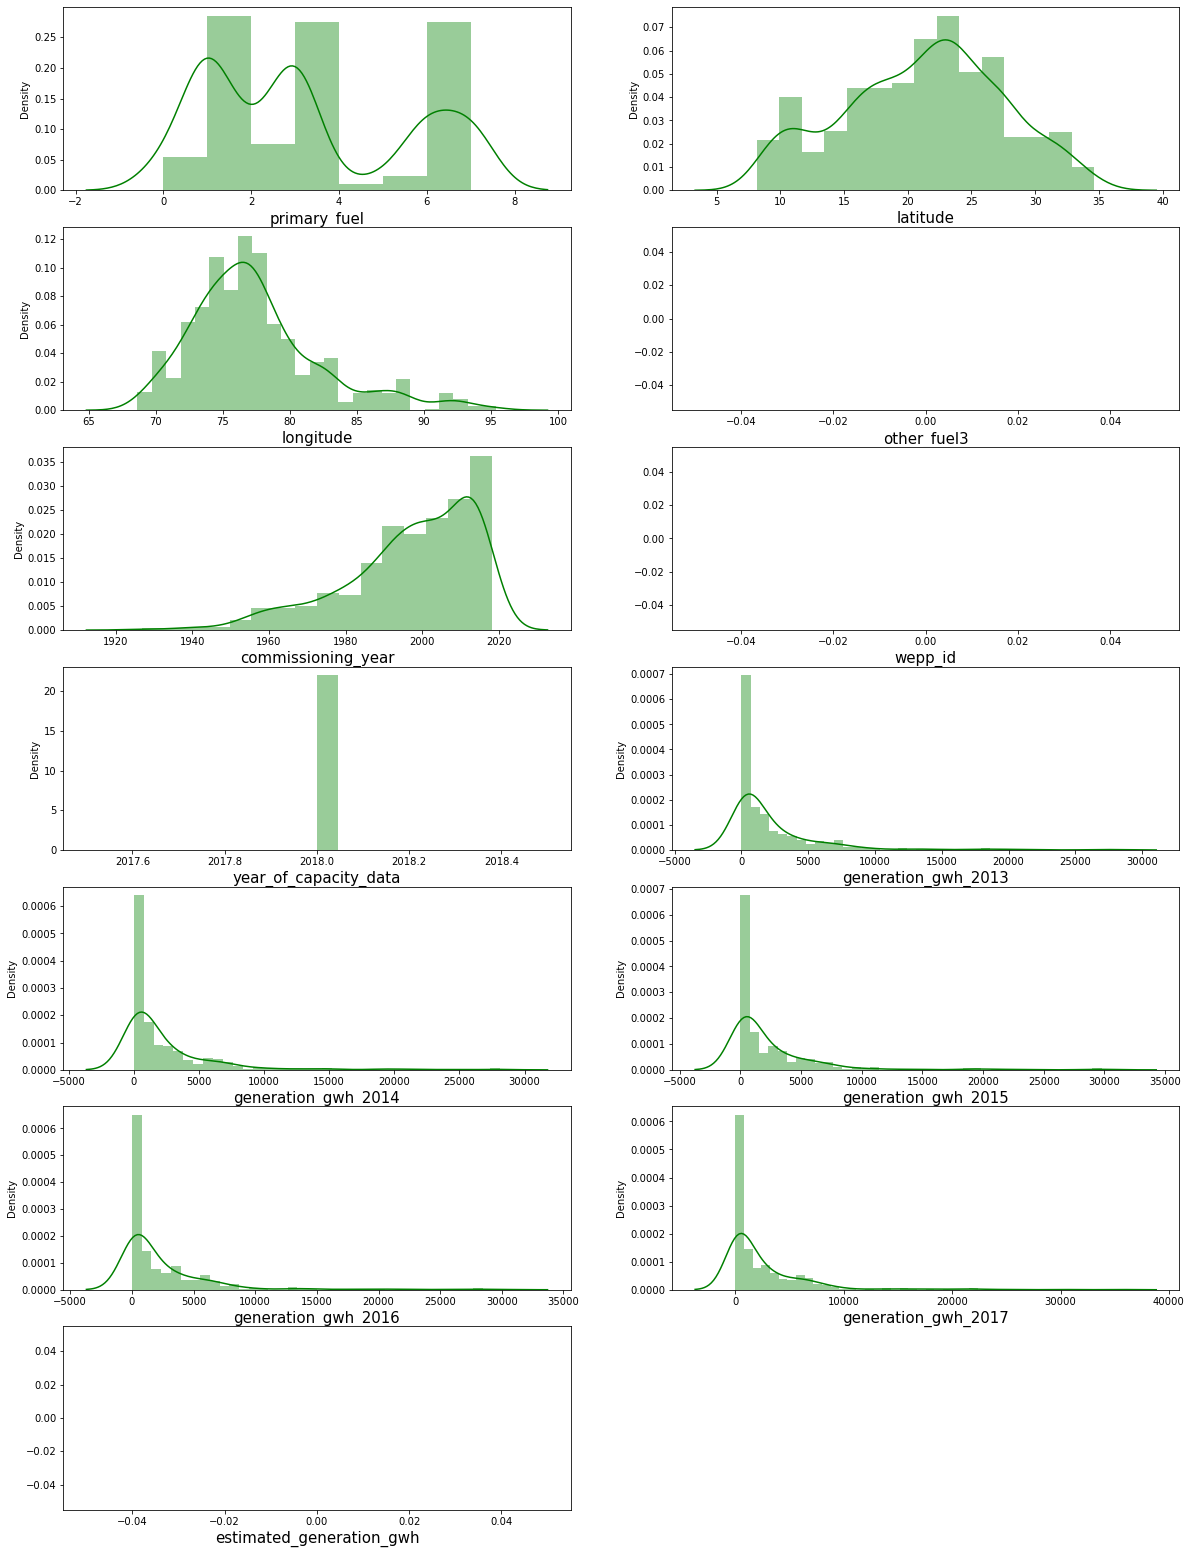

In [380]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

##### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

### Analysis through boxplot

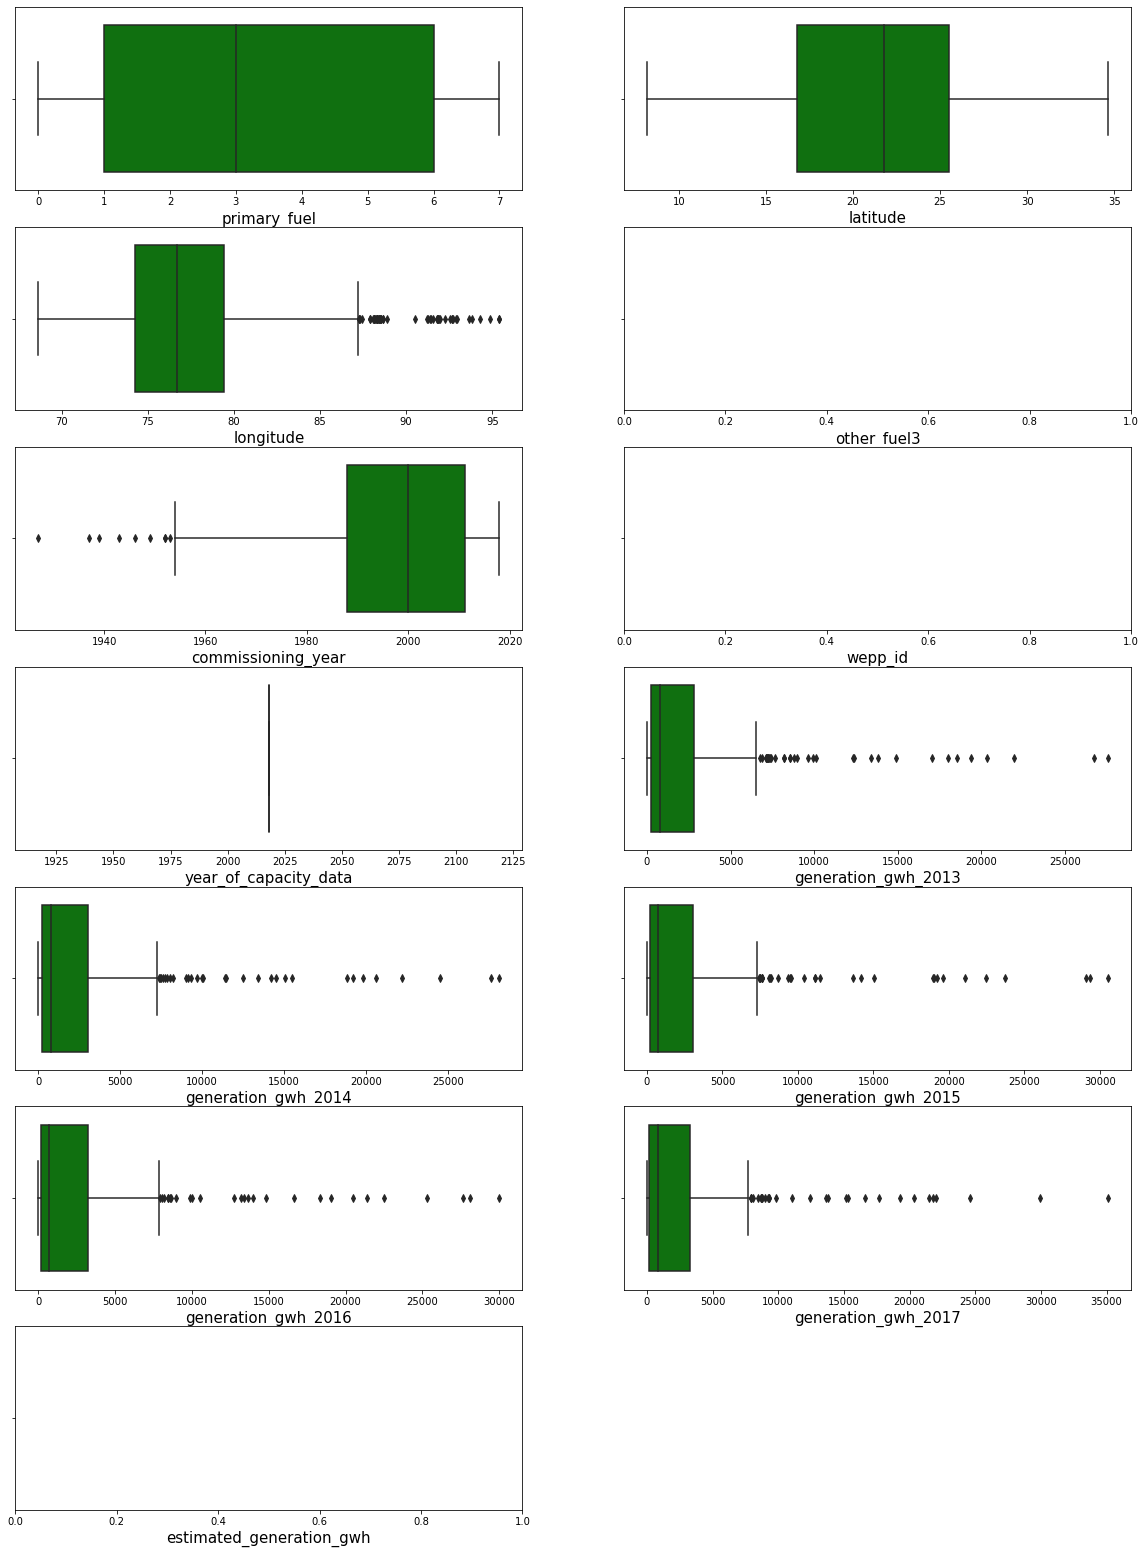

In [381]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.boxplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### maximum column contains outliers('latitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

### Analysis through histplot

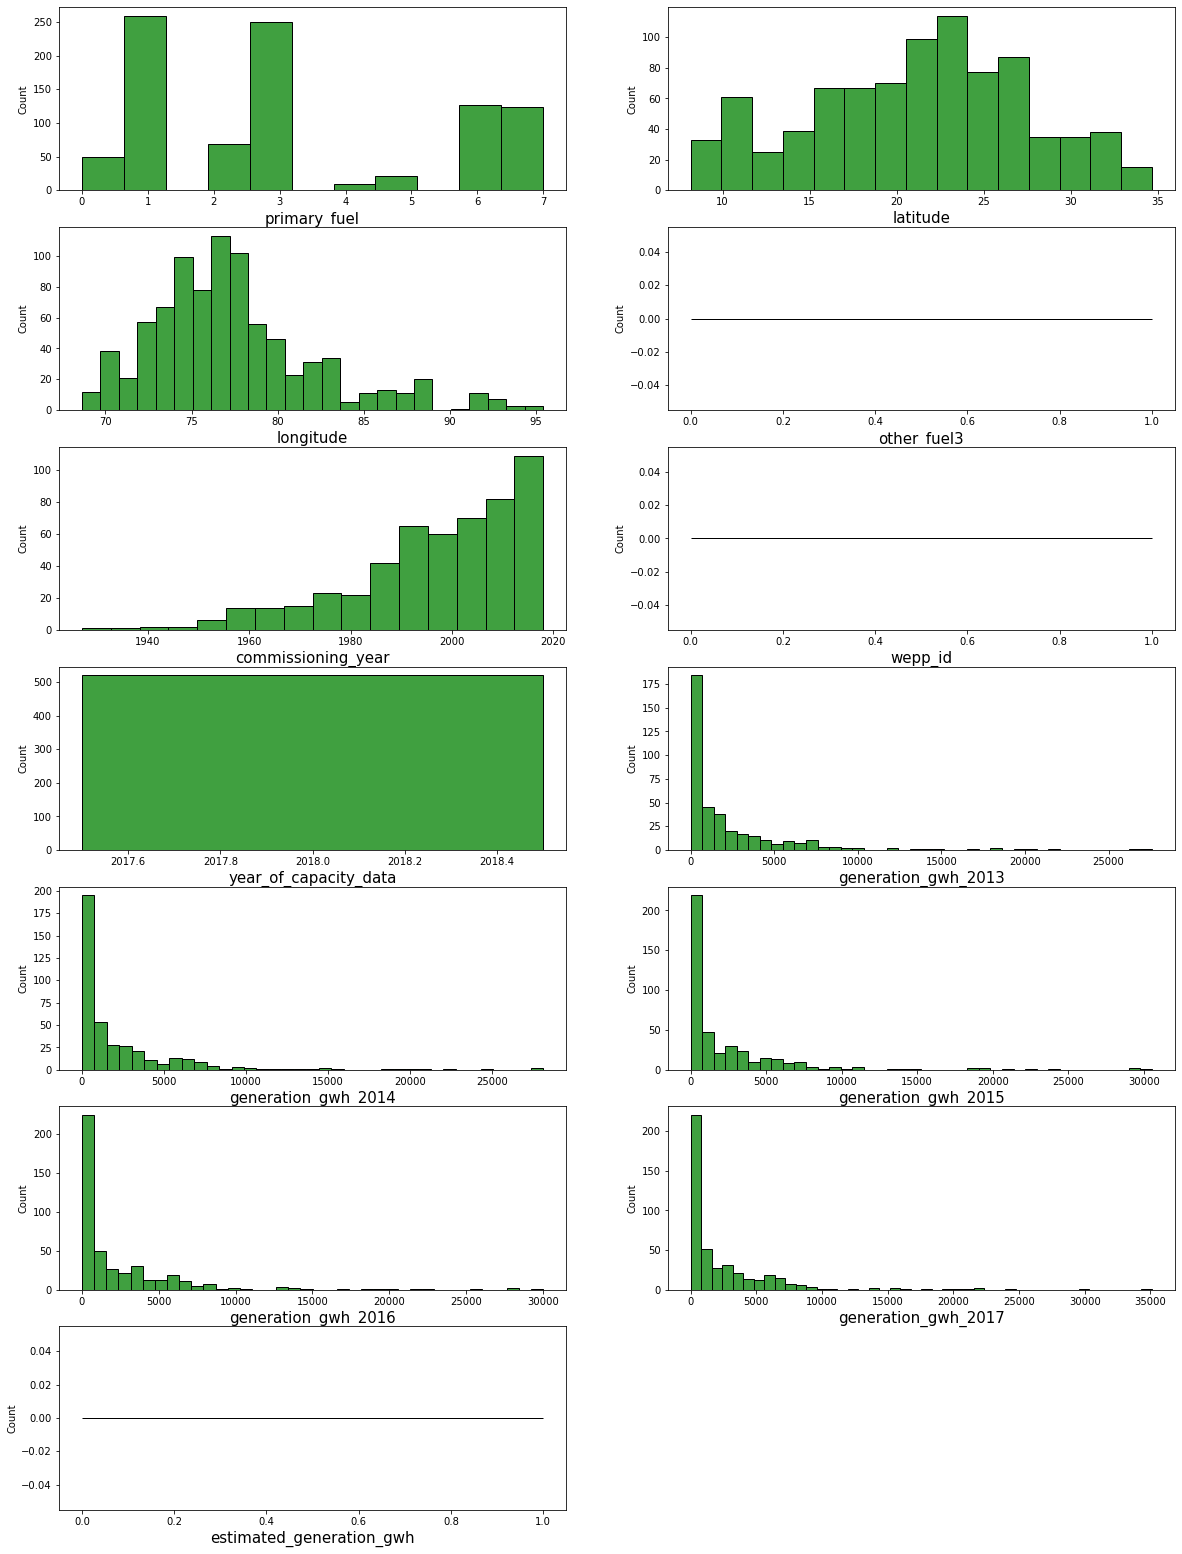

In [382]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

## Bi variate analysis
Bi variate analysis is works with two variables.

In [383]:
feature = df[['primary_fuel', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

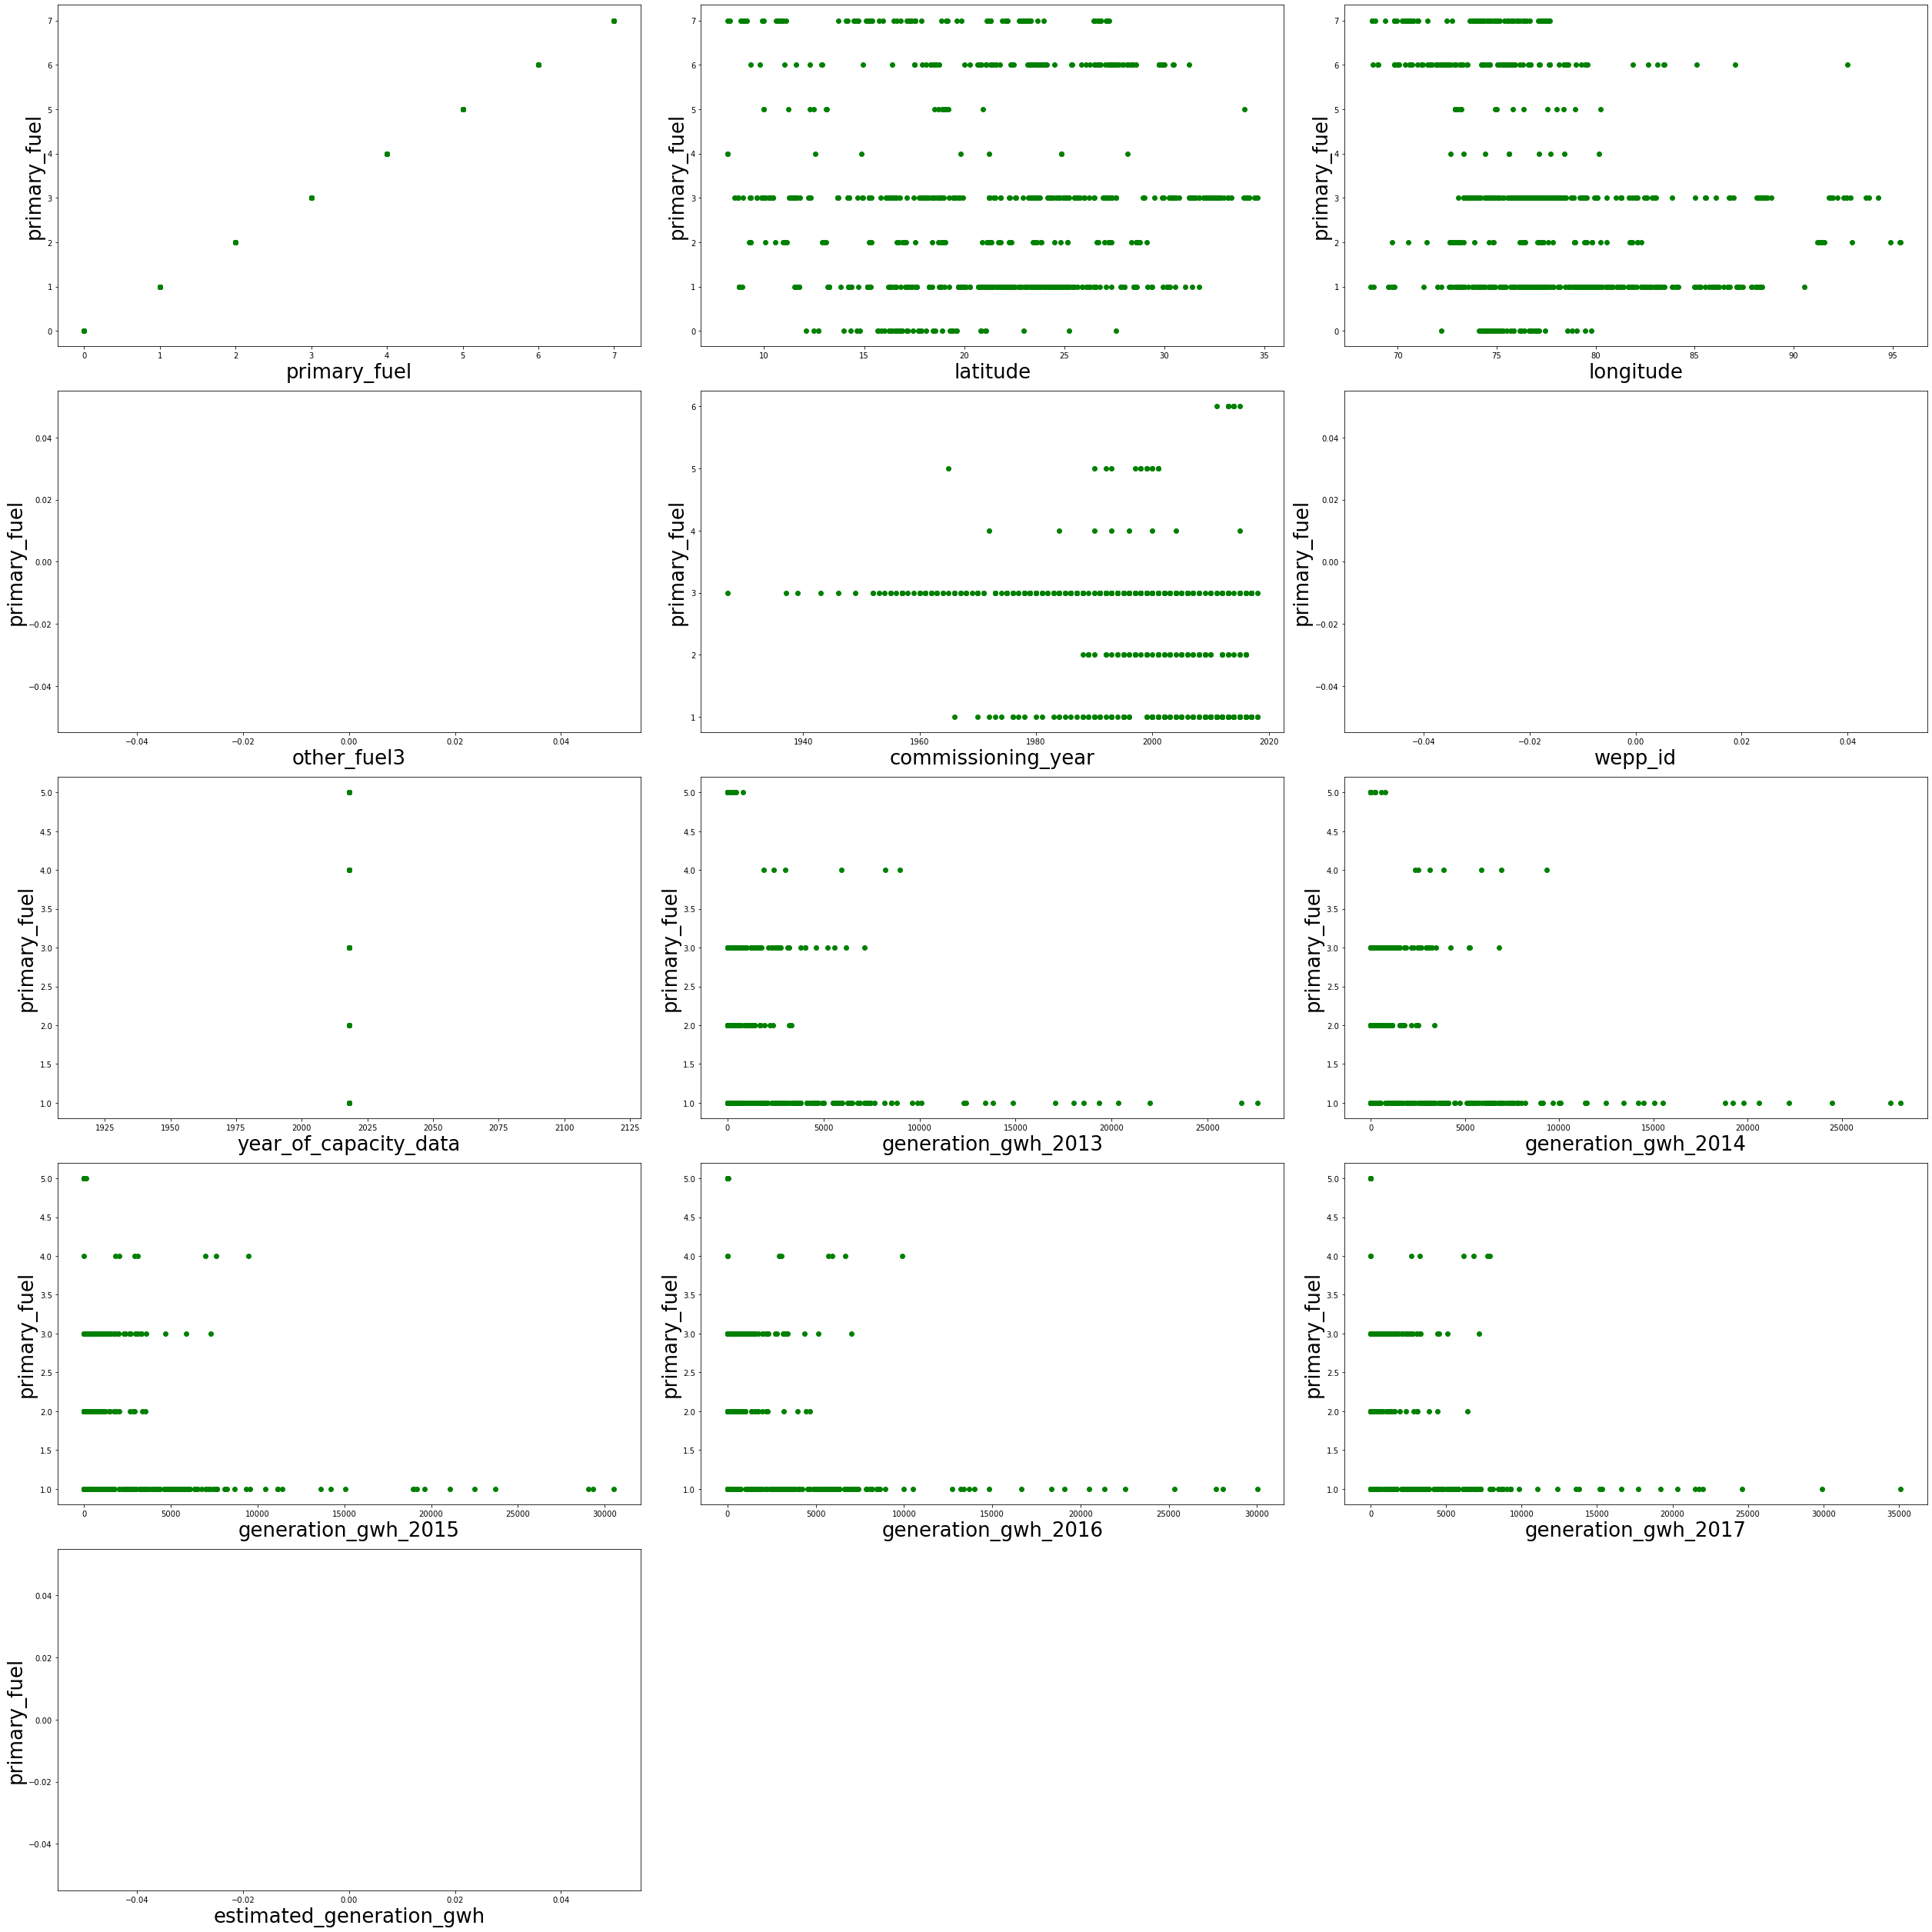

In [384]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['primary_fuel'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('primary_fuel', fontsize=26)
    plotnumber += 1
plt.tight_layout()

There are some variables are having some amount of linear relationship with target variable
and some are having  non linear relationship with target variable.

As we see in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

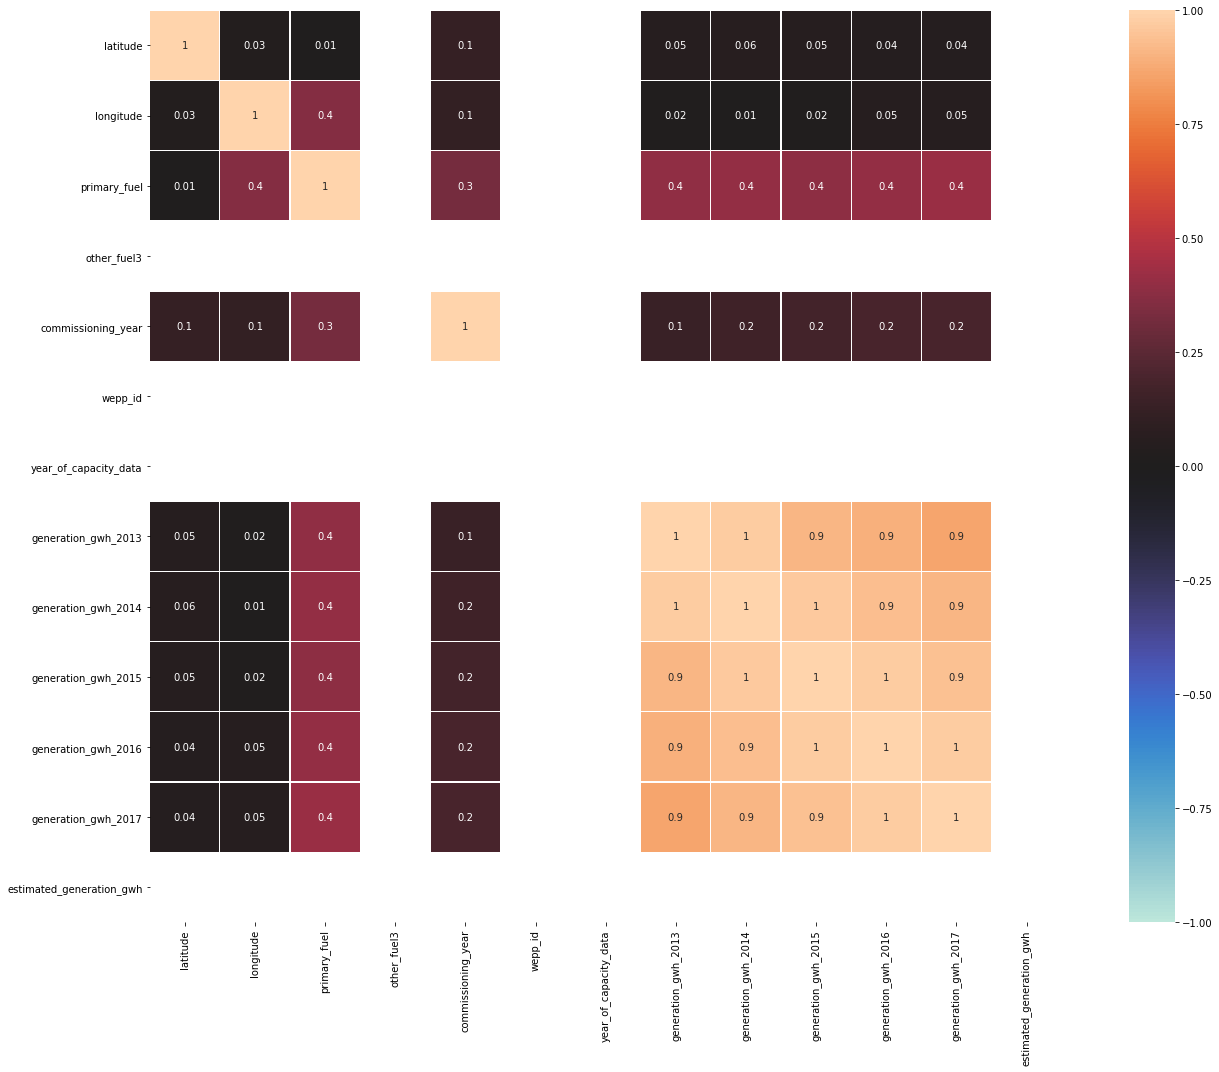

In [385]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

##### As shown in plot other_fuel3, wepp_id, year_of_capacity_data and estimated_generation_gwh are not having relationship with target variable and other  input variables are almost having good relation with target variable.

##### latitude is also having poor corelation with target variable

## Find out which columns are positively and negatively correlated with each other

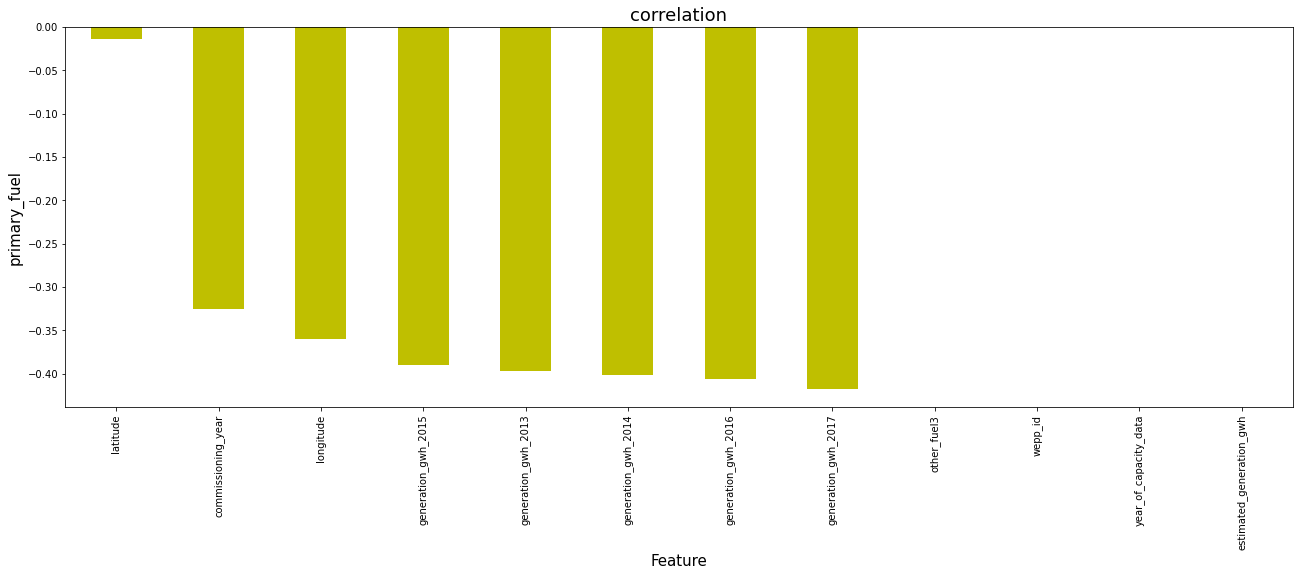

In [386]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('primary_fuel', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot all features are negatively correlated with target variable. There are no positive correlation in it.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

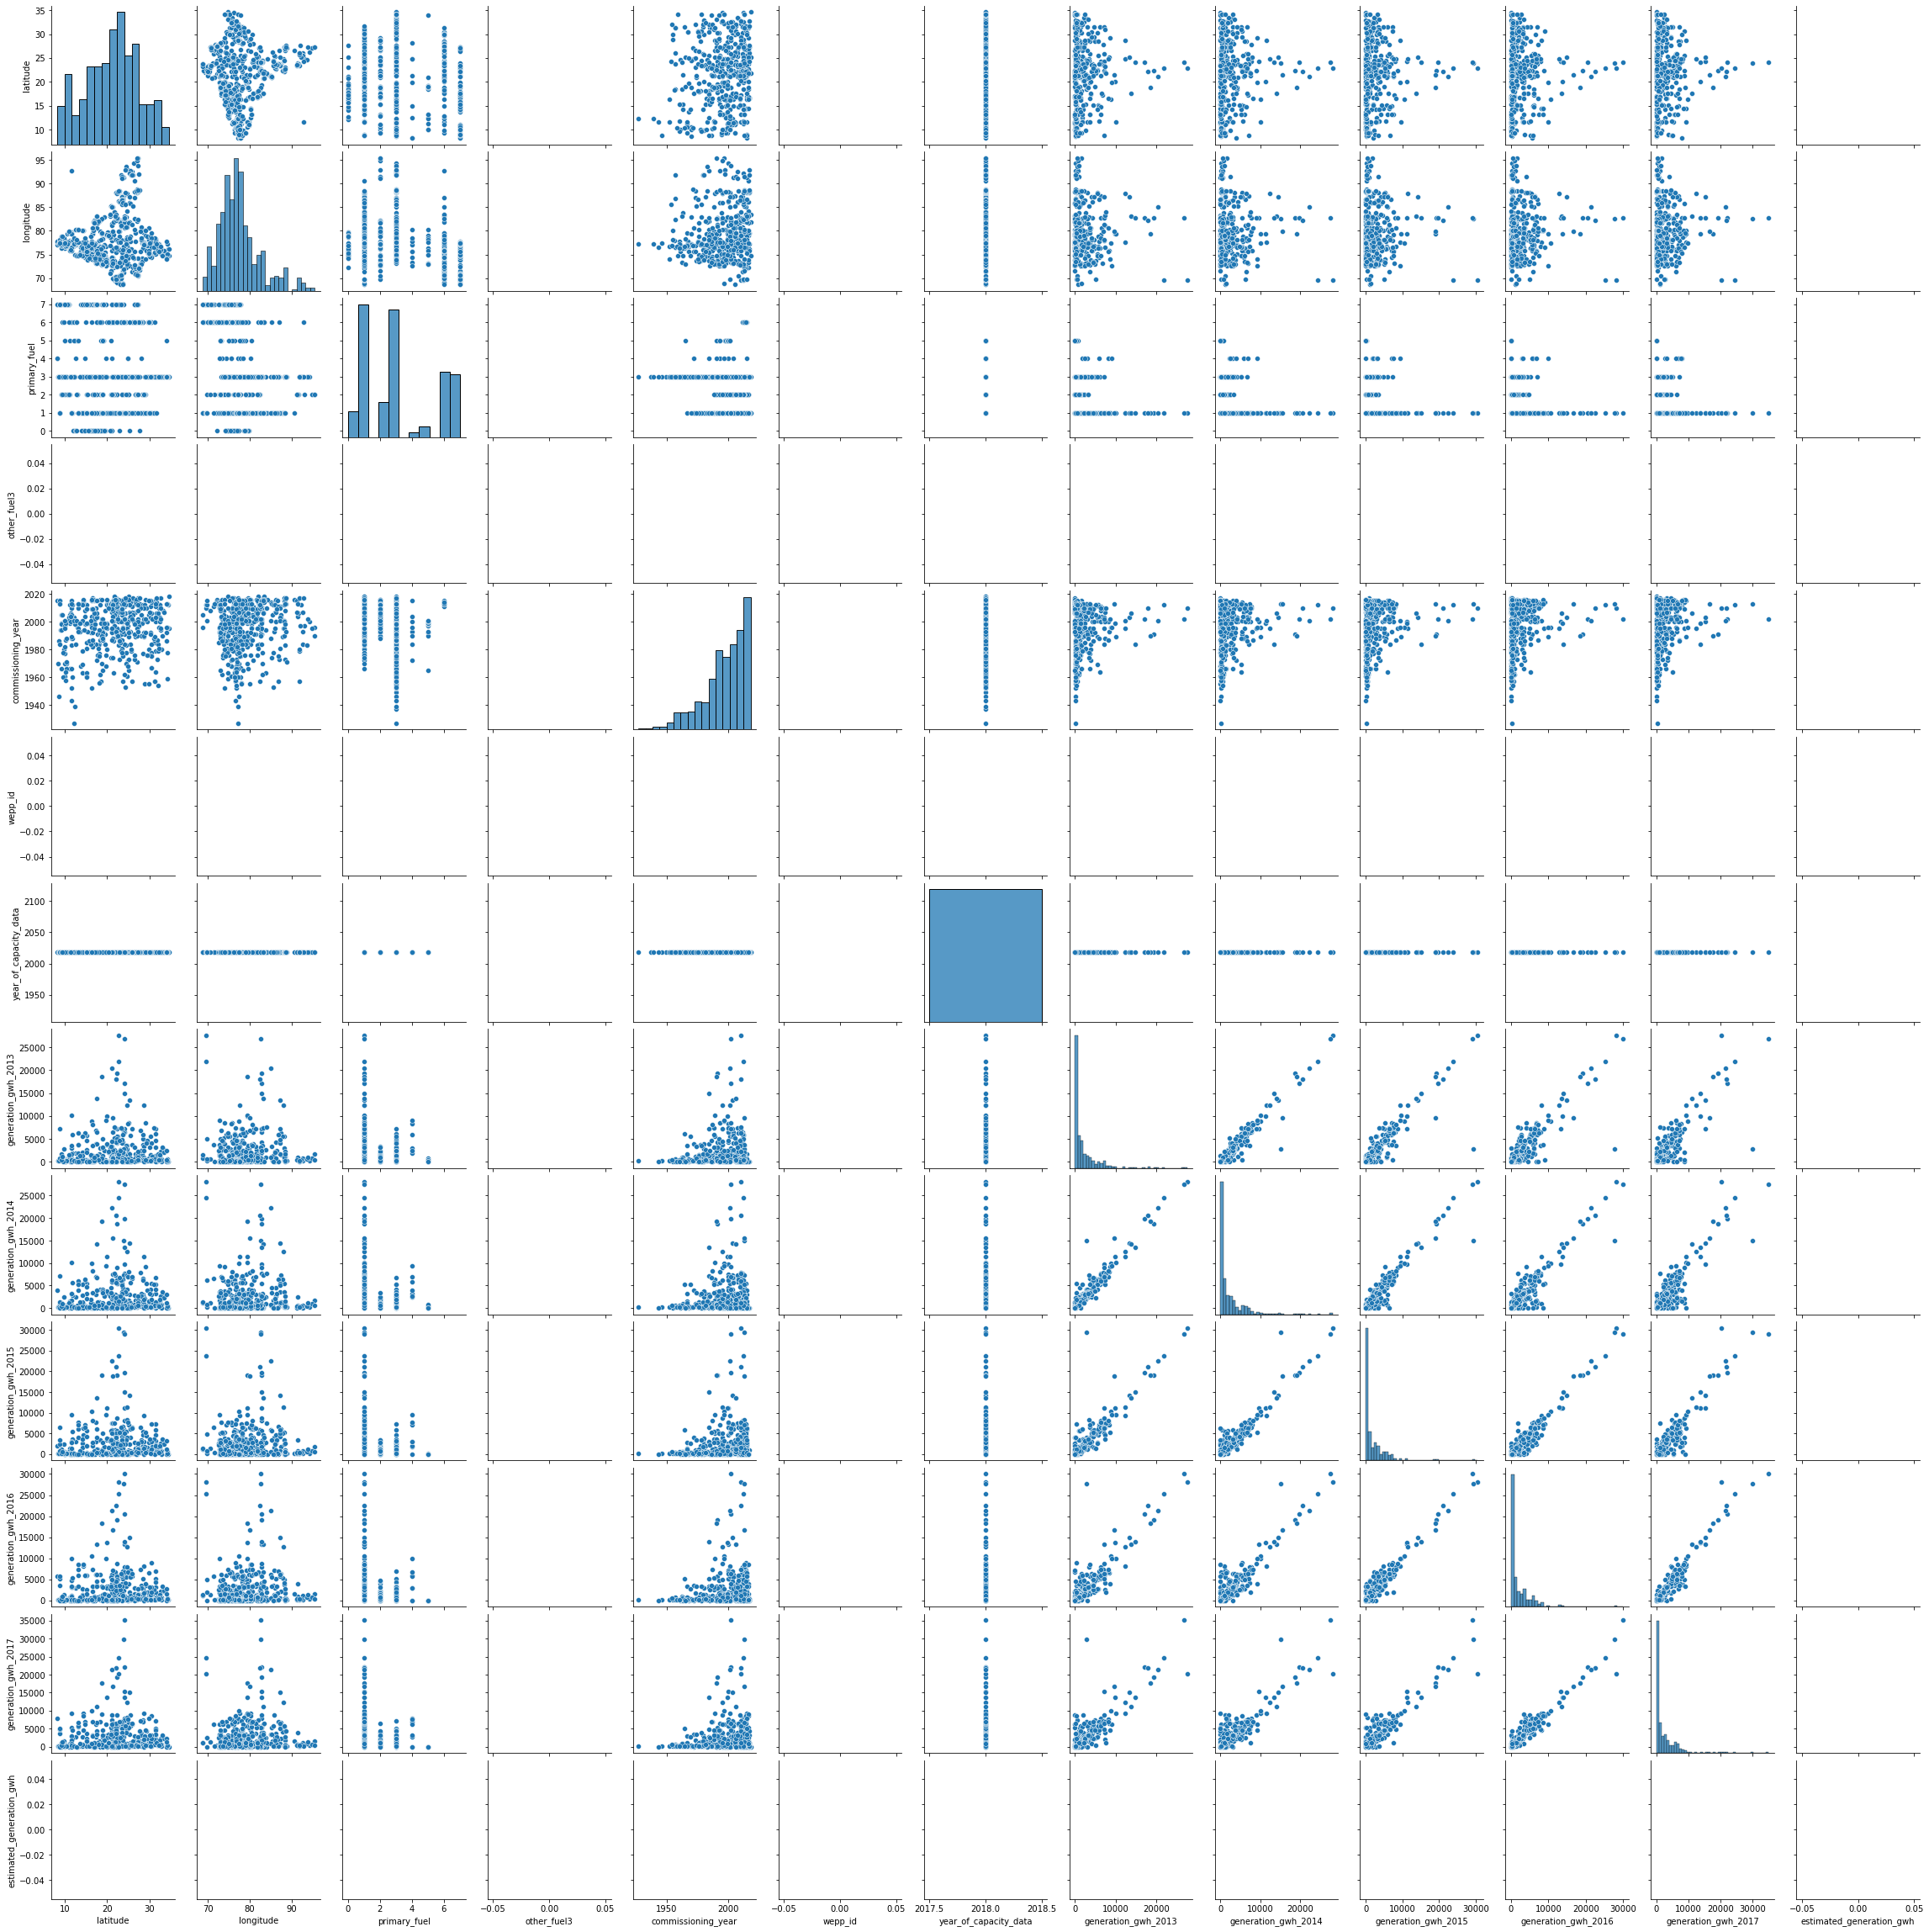

In [387]:
sn.pairplot(df)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

## Handling missing values

In [388]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### 1. latitude

In [389]:
# Check unique values of latitude column
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 13.0977, 28.506 , 16.2804, 33.1815,
       32.8063, 23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956,
       32.1686, 24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999,
       22.9417, 25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546,
       17.3816, 20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932,
       13.7008, 13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012,
       19.5132, 21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 ,
       18.455 , 18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172,
       24.8263, 22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145,
       21.2083,  9.9

It is a Contineous column so fill null values with mean/median

In [390]:
df['latitude']= df['latitude'].fillna(df['latitude'].mean())

#### 2. longitude

In [391]:
# Check unique values of longitude column
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 80.2695,
       77.3066, 75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421,
       74.689 , 82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562,
       83.1889, 91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   ,
       80.2682, 78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111,
       76.7909, 77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311,
       79.7708, 73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659,
       77.7145, 74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425,
       74.6216, 78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333,
       86.0888, 85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 ,
       78.9535, 78.9

In [392]:
df['longitude']= df['longitude'].fillna(df['longitude'].mean())

#### 3. other_fuel1

In [393]:
# Check unique values of other_fuel1 column
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [394]:
df['other_fuel1']= df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

#### 4. commissioning_year

In [395]:
# Check unique values of commissioning_year column
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [396]:
df['commissioning_year']= df['commissioning_year'].fillna(df['commissioning_year'].mean())

#### 5. owner

In [397]:
# Check unique values of owner column
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [398]:
df['owner']= df['owner'].fillna(df['owner'].mode()[0])

#### 6. geolocation_source

In [399]:
# Check unique values of geolocation_source column
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [400]:
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

#### 7. year_of_capacity_data

In [401]:
# Check unique values of year_of_capacity_data column
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [402]:
df['year_of_capacity_data']= df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())

#### 8.generation_gwh_2013

In [403]:
# Check unique values of generation_gwh_2013 column
df['generation_gwh_2013'].value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [404]:
df['generation_gwh_2013']= df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())

#### 9. generation_gwh_2014

In [405]:
df['generation_gwh_2014']= df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

#### 10. generation_gwh_2015

In [406]:
df['generation_gwh_2015']= df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

#### 11. generation_gwh_2016

In [407]:
df['generation_gwh_2016']= df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

#### 12. generation_gwh_2017

In [408]:
df['generation_gwh_2017']= df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

#### 13. generation_data_source

In [409]:
# Check unique values of generation_gwh_2013 column
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [410]:
df['generation_data_source']= df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

##### After filling missing values the dataset is like 

In [411]:
df

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,6,Oil,NaN,NaN,...,National Renewable Energy Laboratory,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,7,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,2,Oil,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,6,Oil,NaN,NaN,...,Industry About,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,7,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,1,Oil,NaN,NaN,...,WRI,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority,NaN


after filling missing values the dataset looks like this and rest column will be drop because of poor correlation with target variable


## Encoding/dropping columns

In [412]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
latitude                    float64
longitude                   float64
primary_fuel                  int32
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [413]:
df['country'].unique()

array(['IND'], dtype=object)

There are 1 unique values present in country column.

In [414]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

as shown in above country column is having all 908 similar values so we can drop that column

In [415]:
#drop country column 
df=df.drop(['country'], axis=1)

#### 2. country_long

In [416]:
df['country_long'].unique()

array(['India'], dtype=object)

In [417]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

as shown in above country column_long is having all 908 similar values so we can drop that column

In [418]:
#drop country_long column 
df=df.drop(['country_long'], axis=1)

#### 3. name

In [419]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [420]:
df['name'].value_counts()

RAJASHREE CEMENT             1
HIRAKUD I&II                 1
YELHANKA (DG)                1
HZL Nandurbar Maharashtra    1
CORE GREEN SUGAR             1
                            ..
BANDAKHAR TPP                1
THAMMINAPATNAM TPP           1
Tiruppur                     1
Gujurat Solar On             1
KALLUR GRINDING              1
Name: name, Length: 908, dtype: int64

as shown in aboe name column is having all 908 similar values so we can drop that column

In [421]:
#drop name column 
df=df.drop(['name'], axis=1)

#### 4. gppd_idnr

In [422]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [423]:
df['gppd_idnr'].value_counts()

WRI1026209    1
WRI1026197    1
IND0000056    1
IND0000278    1
IND0000118    1
             ..
IND0000396    1
WRI1026216    1
WRI1026164    1
IND0000281    1
WRI1026072    1
Name: gppd_idnr, Length: 908, dtype: int64

as shown in above gppd_idnr column is having all 908 similar values so we can drop that column

In [424]:
#drop gppd_idnr column 
df=df.drop(['gppd_idnr'], axis=1)

#### 5. other_fuel1

In [425]:
df['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

as shown in above other_fuel1 column is having more than 70% data values are similar so we can drop that column

In [426]:
#drop other_fuel1 column 
df=df.drop(['other_fuel1'], axis=1)

#### 6. other_fuel2

In [427]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

as shown in above other_fuel2 column is having all 908 similar values. so we can drop that column

In [428]:
#drop other_fuel2 column 
df=df.drop(['other_fuel2'], axis=1)

#### 7.generation_data_source 

In [429]:
df['generation_data_source'].value_counts()

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [430]:
#drop generation_data_source column 
df=df.drop(['generation_data_source'], axis=1)

#### 8. DROP wepp_id, other_fuel3, estimated_generation_gwh and year_of_capacity_data columns because it is having all null values

In [431]:
#drop wepp_id column 
df=df.drop(['wepp_id'], axis=1)

In [432]:
#drop other_fuel3 column 
df=df.drop(['other_fuel3'], axis=1)

In [433]:
#drop estimated_generation_gwh column 
df=df.drop(['estimated_generation_gwh'], axis=1)

In [434]:
#drop year_of_capacity_data column 
df=df.drop(['year_of_capacity_data'], axis=1)

In [435]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [436]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [437]:
df.dtypes

latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                    int32
source                   int32
url                      int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

as shown above all columns are encoded now.

## Visualization of all input variables correlation with targate variable after encoding

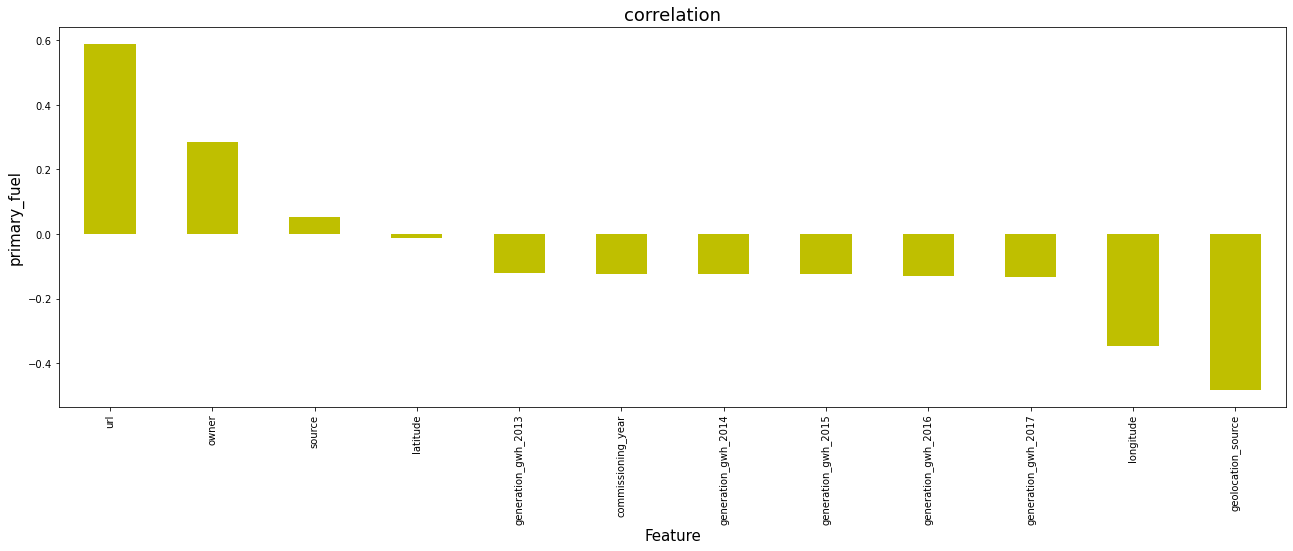

In [438]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('primary_fuel', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

## Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [439]:
df.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,21.196189,77.447848,3.205947,1996.876894,56.113436,43.823789,94.429515,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,6.088110,4.781201,2.281339,12.994825,82.501086,44.624092,70.352824,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.057825,74.390250,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,21.278850,76.978950,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.183775,79.211600,6.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## 1.Outlier removal using Zscore

In [440]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['longitude','commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 13)
shape after          : (854, 13)
Percentage Loss      : 0.05947136563876652


5.94% data will loss after applying Zscore technique.

In [441]:
(854/908)*100

94.05286343612335

#### 94.05% data remains in dataset after using zscore technique

In [442]:
new_df.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000
mean,21.095772,77.007289,3.262295,1997.793141,59.166276,45.100703,96.645199,1.718970,2077.309031,2161.634080,2131.029136,2171.337711,2258.824007
std,6.110249,4.208855,2.326071,11.240133,83.985040,45.618112,71.928693,0.692069,1373.570489,1463.785752,1512.008568,1577.139604,1646.991085
min,8.168900,68.644700,0.000000,1958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.924050,74.275300,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1434.515050,1261.939775,959.238050,936.745463,1001.702037
50%,21.196189,76.731700,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.084300,78.923000,6.000000,2003.000000,107.000000,41.750000,124.750000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,91.565000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000


In [443]:
new_df

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side

In [444]:
df2 = df

In [445]:
#features in which outliers are detected
fe = df2[['longitude','commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

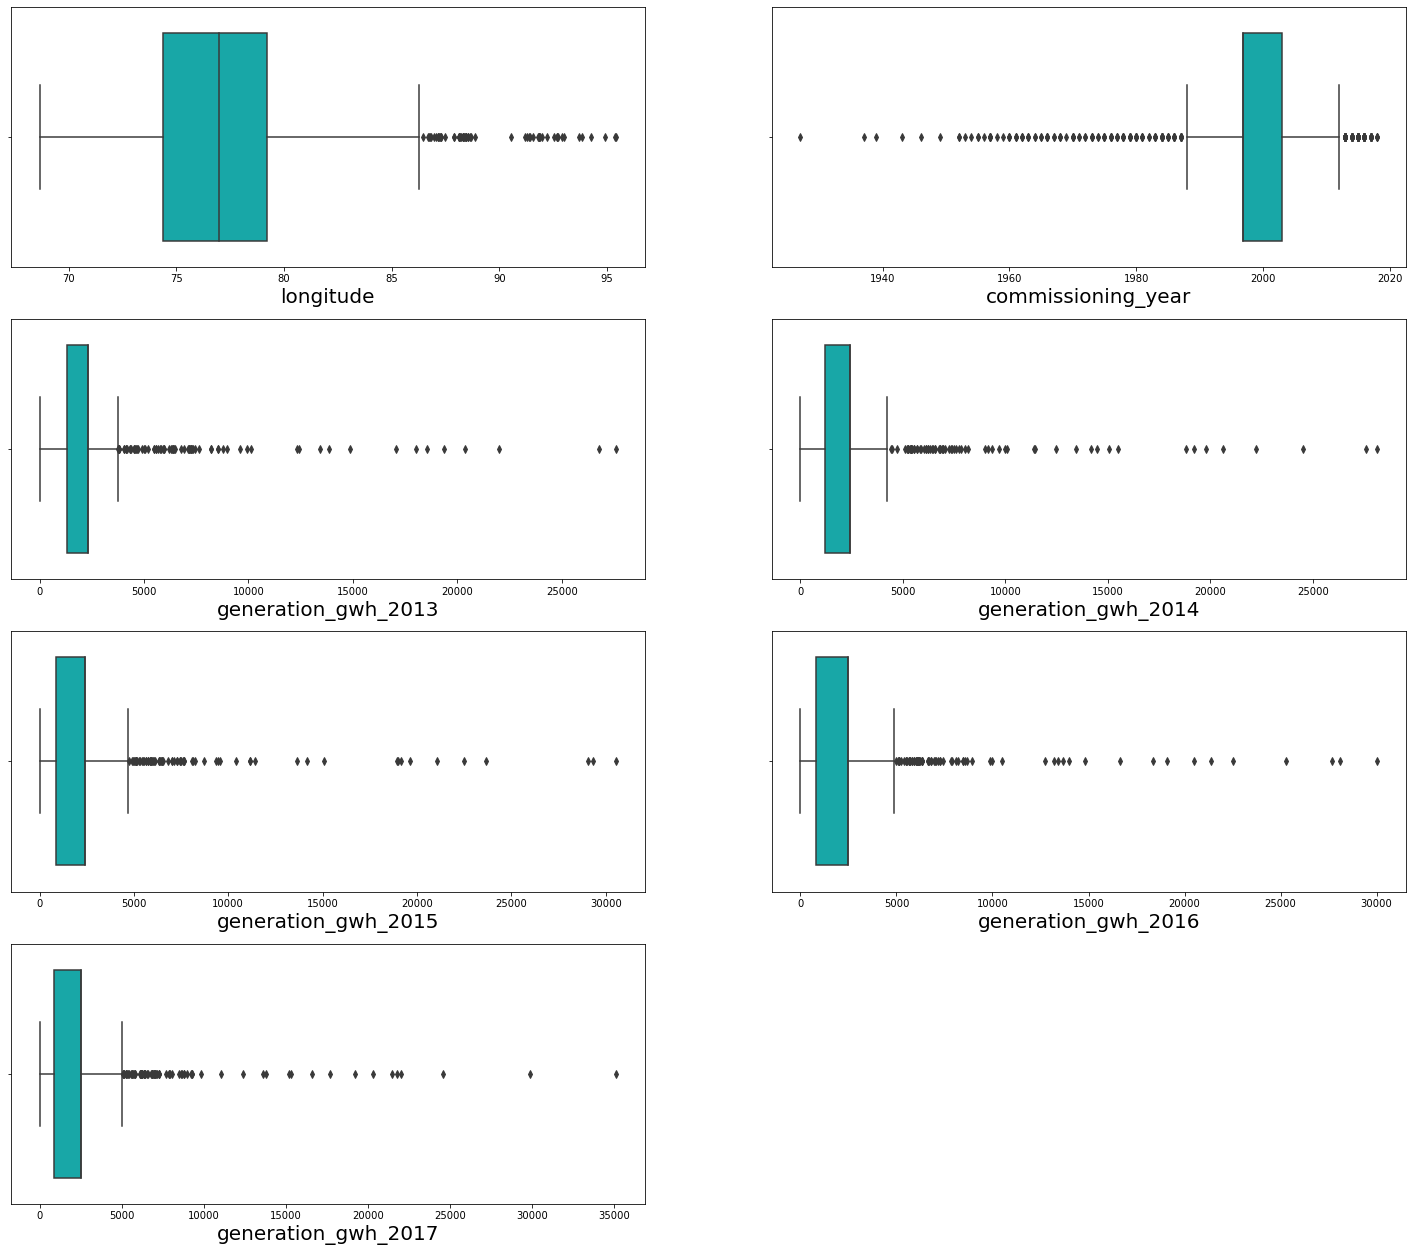

In [446]:
plt.figure(figsize=(25,45))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(8,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [447]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [448]:
df2.describe()

,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,21.196189,77.447848,3.205947,1996.876894,56.113436,43.823789,94.429515,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,6.088110,4.781201,2.281339,12.994825,82.501086,44.624092,70.352824,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.057825,74.390250,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,21.278850,76.978950,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,25.183775,79.211600,6.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,34.649000,95.408000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)

In [449]:
#Check the Outliers for generation_gwh_2013
#Remove outliers from lower side so, use lower side formula

generation_gwh_2013_out = (q3.generation_gwh_2013 + (1.5*(iqr.generation_gwh_2013)))
generation_gwh_2013_out

3761.339766991147

In [450]:
index_out = np.where(df2['generation_gwh_2013'] > generation_gwh_2013_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
831,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
832,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
833,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 835 rows will remains in dataframe. 

In [451]:
#Check the Outliers for longitude
#Remove outliers from lower side so, use lower side formula

longitude_out = (q3.longitude + (1.5*(iqr.longitude)))
longitude_out

86.443625

In [452]:
index_out = np.where(df2['longitude'] > longitude_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
4,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
779,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
780,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
781,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 783 rows will remains in dataframe.

In [453]:
#Check the Outliers for generation_gwh_2014
#Remove outliers from lower side so, use lower side formula

generation_gwh_2014_out = (q3.generation_gwh_2014 + (1.5*(iqr.generation_gwh_2014)))
generation_gwh_2014_out

4288.086053635566

In [454]:
index_out = np.where(df2['generation_gwh_2014'] > generation_gwh_2014_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,4,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
4,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
772,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
773,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
774,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 776 rows will remains in dataframe.

In [455]:
#Check the Outliers for generation_gwh_2015
#Remove outliers from lower side so, use lower side formula

generation_gwh_2015_out = (q3.generation_gwh_2015 + (1.5*(iqr.generation_gwh_2015)))
generation_gwh_2015_out

4723.873433504203

In [456]:
index_out = np.where(df2['generation_gwh_2015'] > generation_gwh_2015_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,10.4547,77.0078,3,1970.000000,5,22,58,2,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
765,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
766,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
767,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 769 rows will remains in dataframe.

In [457]:
#Check the Outliers for generation_gwh_2016
#Remove outliers from lower side so, use lower side formula

generation_gwh_2016_out = (q3.generation_gwh_2016 + (1.5*(iqr.generation_gwh_2016)))
generation_gwh_2016_out

4894.896104302063

In [458]:
index_out = np.where(df2['generation_gwh_2016'] > generation_gwh_2016_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,10.4547,77.0078,3,1970.000000,5,22,58,2,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
757,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
758,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
759,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 761 rows will remains in dataframe.

In [459]:
#Check the Outliers for generation_gwh_2017
#Remove outliers from lower side so, use lower side formula

generation_gwh_2017_out = (q3.generation_gwh_2017 + (1.5*(iqr.generation_gwh_2017)))
generation_gwh_2017_out

5050.727813131996

In [460]:
index_out = np.where(df2['generation_gwh_2017'] > generation_gwh_2017_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,10.4547,77.0078,3,1970.000000,5,22,58,2,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,903,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
746,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
747,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
748,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 750 rows will remains in dataframe.

In [461]:
#Check the Outliers for commissioning_year
#Remove outliers from lower side so, use lower side formula

commissioning_year_out = (q3.commissioning_year + (1.5*(iqr.commissioning_year)))
commissioning_year_out

2012.184659090909

In [462]:
index_out = np.where(df2['commissioning_year'] > commissioning_year_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,5,23.7689,68.6447,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
4,6,10.4547,77.0078,3,1970.000000,5,22,58,2,147.568450,157.558250,152.195200,61.421350,89.629600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,902,13.1156,77.5838,5,1993.000000,5,22,58,2,20.900000,0.000000,0.000000,0.000000,2531.754458
681,904,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
682,905,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
683,906,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


after removing outliers 685 rows will remains in dataframe.

#### After removing outliers from only in all columns using IQR technique we can see there are only 685 rows will remains in dataset which is very less than zscore technique.

In [463]:
685/908 * 100

75.44052863436124

##### 75.44% data remains after using IQR technique in one column which is less than zscore technique.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [464]:
new_df.skew()

latitude              -0.106361
longitude              0.862421
primary_fuel           0.416510
commissioning_year    -0.855922
owner                  1.279694
source                 1.739843
url                    1.420066
geolocation_source    -2.072421
generation_gwh_2013    1.545389
generation_gwh_2014    1.458480
generation_gwh_2015    1.331003
generation_gwh_2016    1.341657
generation_gwh_2017    1.275889
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

1. commissioning_year
2. generation_gwh_2013
3. generation_gwh_2014
4. generation_gwh_2015
5. generation_gwh_2016
6. generation_gwh_2017

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

In [465]:
new_df.dtypes

latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                    int32
source                   int32
url                      int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

## Apply  yeo-johnson Power transformation to remove skewness

In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data and .

In [466]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df['longitude'] = scaler.fit_transform(new_df['longitude'].values.reshape(-1,1))
new_df['commissioning_year'] = scaler.fit_transform(new_df['commissioning_year'].values.reshape(-1,1))
new_df['generation_gwh_2013'] = scaler.fit_transform(new_df['generation_gwh_2013'].values.reshape(-1,1))
new_df['generation_gwh_2014'] = scaler.fit_transform(new_df['generation_gwh_2014'].values.reshape(-1,1))
new_df['generation_gwh_2015'] = scaler.fit_transform(new_df['generation_gwh_2015'].values.reshape(-1,1))
new_df['generation_gwh_2016'] = scaler.fit_transform(new_df['generation_gwh_2016'].values.reshape(-1,1))
new_df['generation_gwh_2017'] = scaler.fit_transform(new_df['generation_gwh_2017'].values.reshape(-1,1))

In [467]:
new_df.skew()

latitude              -0.106361
longitude             -0.000262
primary_fuel           0.416510
commissioning_year     0.029259
owner                  1.279694
source                 1.739843
url                    1.420066
geolocation_source    -2.072421
generation_gwh_2013   -0.172913
generation_gwh_2014   -0.251500
generation_gwh_2015   -0.321613
generation_gwh_2016   -0.323292
generation_gwh_2017   -0.338700
dtype: float64

##### we can see skewness of all contineous columns removed. 

<AxesSubplot:xlabel='longitude', ylabel='Density'>

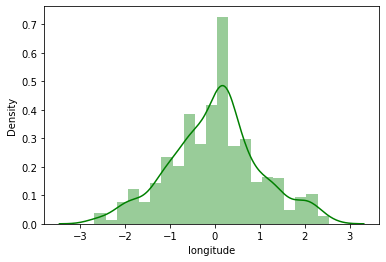

In [468]:
sn.distplot(new_df["longitude"], color = 'g')     

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

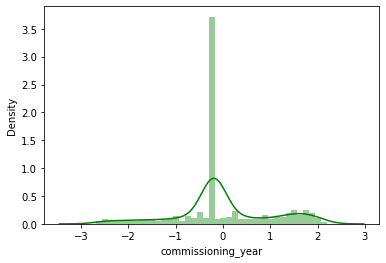

In [469]:
sn.distplot(new_df["commissioning_year"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

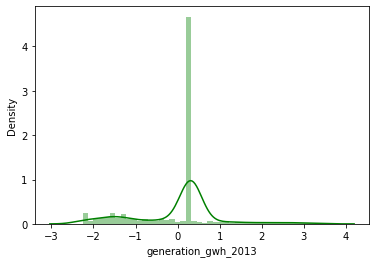

In [470]:
sn.distplot(new_df["generation_gwh_2013"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

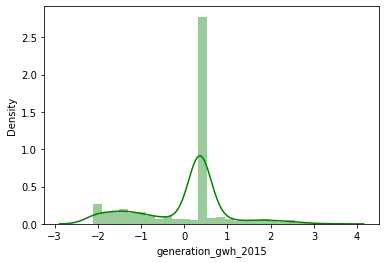

In [471]:
sn.distplot(new_df["generation_gwh_2015"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

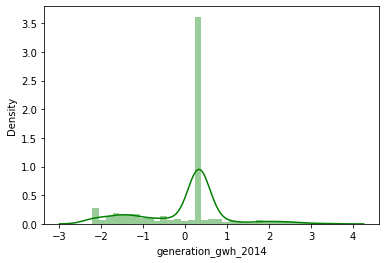

In [472]:
sn.distplot(new_df["generation_gwh_2014"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

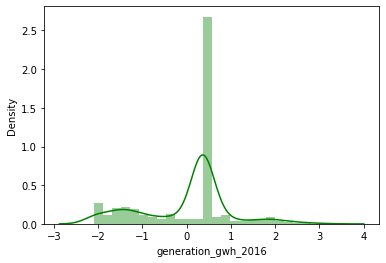

In [473]:
sn.distplot(new_df["generation_gwh_2016"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

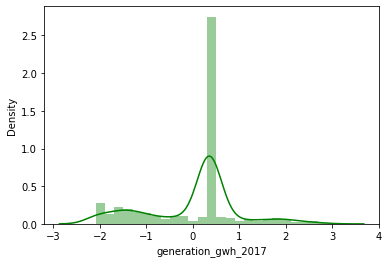

In [474]:
sn.distplot(new_df["generation_gwh_2017"], color = 'g')     

As shown in plot skewness removes after using power transformation skewness removes.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [475]:
x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

## Scalling technique

In [476]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [477]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.111459,latitude
1,1.307428,longitude
2,1.097662,commissioning_year
3,3.176969,owner
4,2.952217,source
5,1.449332,url
6,1.479508,geolocation_source
7,6.467264,generation_gwh_2013
8,8.341977,generation_gwh_2014
9,7.692936,generation_gwh_2015


as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [478]:
new_df=new_df.drop(['generation_gwh_2016'], axis=1)

In [479]:
x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

In [480]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [481]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.108897,latitude
1,1.299788,longitude
2,1.089321,commissioning_year
3,3.175749,owner
4,2.952157,source
5,1.447444,url
6,1.478958,geolocation_source
7,6.429458,generation_gwh_2013
8,8.324277,generation_gwh_2014
9,5.196195,generation_gwh_2015


In [482]:
new_df=new_df.drop(['generation_gwh_2014'], axis=1)

In [483]:
x = new_df.drop(columns = 'primary_fuel', axis=1)
y = new_df['primary_fuel']

In [484]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [485]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.104567,latitude
1,1.298741,longitude
2,1.088919,commissioning_year
3,3.175159,owner
4,2.952075,source
5,1.447411,url
6,1.478727,geolocation_source
7,3.138466,generation_gwh_2013
8,4.421988,generation_gwh_2015
9,2.924596,generation_gwh_2017


as we have saw in the table vif value is not greater than 5 for any columns. so proceed further

## Scalling

In [486]:
y.value_counts()

1    241
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [487]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

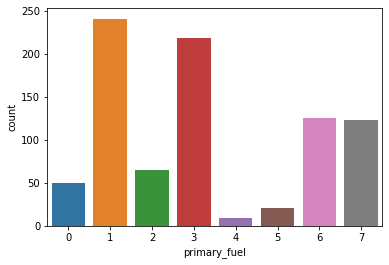

In [488]:
#visualization of target variable 
sn.countplot(new_df["primary_fuel"])
plt.show()

As we can see there is class imbalance in target varibale, so we need to balance that with sampling otherwise the model will get bias.

### Oversampling

In [489]:
from imblearn.over_sampling import RandomOverSampler  #Random Over Sampler
ROS = RandomOverSampler()
x_res, y_res = ROS.fit_resample(x_scalar, y) # it will resample the data
print(y_res.value_counts()) # after this all classes will be balaned

7    241
6    241
5    241
4    241
3    241
2    241
1    241
0    241
Name: primary_fuel, dtype: int64


In [490]:
x_res.shape

(1928, 10)

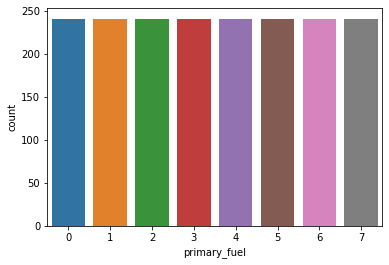

In [491]:
#visualization of target variable 
sn.countplot(y_res)
plt.show()

##### as shown in above we can see all classes are balanced now, safe to proceed further.

## Finding best random state

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [494]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=.25, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.9564315352697096 on Random_state  187


In [495]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.7, random_state = 187)

## 1.Logistic Regression Model

In [496]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [497]:
pred_test=Log_reg.predict(x_test)

In [498]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.689119170984456
[[51 16  0  0  0  8  0  0]
 [ 7 30  6  3 10  3  0  0]
 [ 3 17 25 18  3 15  0  0]
 [ 0  6  6 41  9  4  0  0]
 [ 0  0  0  8 74  0  0  0]
 [12  3  7  3  3 37  0  7]
 [ 0  1  2  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        75
           1       0.41      0.51      0.45        59
           2       0.54      0.31      0.39        81
           3       0.56      0.62      0.59        66
           4       0.75      0.90      0.82        82
           5       0.55      0.51      0.53        72
           6       1.00      0.96      0.98        74
           7       0.91      1.00      0.95        70

    accuracy                           0.69       579
   macro avg       0.68      0.69      0.68       579
weighted avg       0.68      0.69      0.68       579



In [499]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6638920664827401

#### The Accuracy score for logistic regression model is : 68.91%
#### Cross validation score for logistic regression is : 66.38%

## 2.Random forest Classifier

In [500]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [501]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x_res, y_res, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  95.85492227979275
Cross Val Score:  94.60561781240258


###### The Accuracy score for Random Forest Classifier model is : 95.85%
###### Cross validation score for Random Forest Classifier is : 94.60%

## 3.Decision Tree Classifier

In [502]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [503]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.9464594127806563


In [504]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[75  0  0  0  0  0  0  0]
 [ 1 41 10  4  3  0  0  0]
 [ 0  2 77  2  0  0  0  0]
 [ 0  7  2 57  0  0  0  0]
 [ 0  0  0  0 82  0  0  0]
 [ 0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       0.82      0.69      0.75        59
           2       0.87      0.95      0.91        81
           3       0.90      0.86      0.88        66
           4       0.96      1.00      0.98        82
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        70

    accuracy                           0.95       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.95      0.95      0.94       579



In [505]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9387995424264854

###### The Accuracy score for Decision tree Classifier model is : 94.64%
###### Cross validation score for Decision tree Classifier is : 93.87%

## 4.Support vector Classifier

In [510]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [511]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.8151986183074266


In [512]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[62  6  0  2  0  5  0  0]
 [ 8 35  7  6  3  0  0  0]
 [ 0 10 47 15  0  9  0  0]
 [ 0  7  5 51  2  1  0  0]
 [ 0  0  0  8 74  0  0  0]
 [ 0  3  0  3  0 59  0  7]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        75
           1       0.57      0.59      0.58        59
           2       0.80      0.58      0.67        81
           3       0.60      0.77      0.68        66
           4       0.94      0.90      0.92        82
           5       0.80      0.82      0.81        72
           6       1.00      1.00      1.00        74
           7       0.91      1.00      0.95        70

    accuracy                           0.82       579
   macro avg       0.81      0.81      0.81       579
weighted avg       0.82      0.82      0.81       579



In [513]:
cv_score= cross_val_score(sv, x_res, y_res, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8189771886144943

###### The Accuracy score for SVC model is : 81.51%
###### Cross validation score for SVC is : 81.89%

## Comparison of all model
##### The difference between Cross validation score and logistic regression model is: 2.53%
##### The difference between Cross validation score and Random Forest Classifier model is: 1.25%
##### The difference between Cross validation score and Decision tree Classifier model is: 0.77%
##### The difference between Cross validation score and SVC model is: 1.38%
#### as shown in above Decision tree Classifier is having minimum difference, so Decision tree Classifier is best model

## Hyper parameter tunning

In [520]:
# Decision tree Classifier
Parameters = {'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [1, 10, 20, 50, 100],
              'criterion': ["gini", "entropy"],
              'splitter' : ["best", "random"]}

In [521]:
GCV=GridSearchCV(DecisionTreeClassifier(),Parameters,cv=3)

In [522]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 20, 50, 100],
                         'splitter': ['best', 'random']})

In [523]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [528]:
mod = DecisionTreeClassifier( criterion= 'gini', max_depth= 20, min_samples_leaf= 1, splitter='best')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

94.81865284974094


after hyper parameter tunning the accuracy score raise to: 94.81%

## Boosting of model with gradient boosting

In [525]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [526]:
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_train)

In [527]:
from sklearn import metrics
print('accuracy square score', metrics.accuracy_score(y_train, y_pred))

accuracy square score 0.9977761304670126


after boosting the model with gradient boosting the accuracy score raise to :99.77%

## ROC AUC curve to choose best model|

In [529]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [530]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [531]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [532]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [533]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [534]:
#logistic Regression
roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')

0.9251503688115994

In [535]:
#Random Forest Classifier
roc_auc_score(y_test, rf.predict_proba(x_test), multi_class='ovr')

0.9979942925473073

In [536]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovr')

0.9631385514653779

In [537]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state = 41)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_cnb = rfc.predict(x_test)
y_prob_pred_rfc = rfc.predict_proba(x_test)


#predicting the data
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_cnb = gnb.predict(x_test)
y_prob_pred_cnb = gnb.predict_proba(x_test)

In [538]:

y_pred_cnb = lr.predict(x_test)
y_prob_pred_lr = lr.predict_proba(x_test)


y_pred_cnb = dt.predict(x_test)
y_prob_pred_dt = dt.predict_proba(x_test)

## AUC ROC Curve

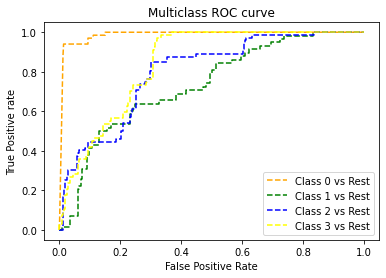

In [539]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

graph for Gaussian NB

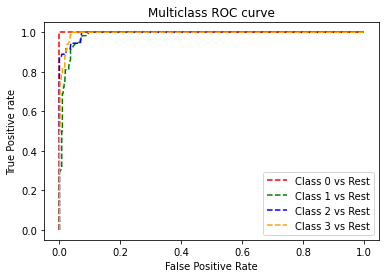

In [540]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_rfc[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

graph for random forest classifier.

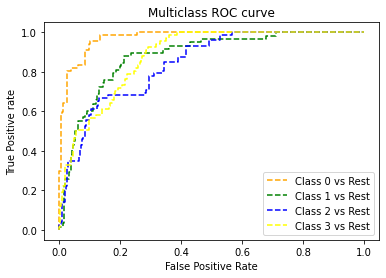

In [541]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_lr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

graph for logistic regression.

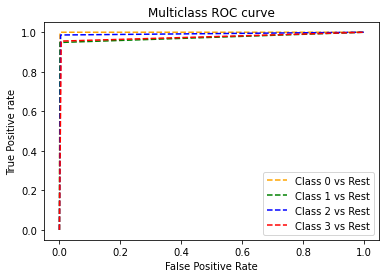

In [543]:
# roc curve for classes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_dt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

graph for decision tree classifier.

## Save the model

In [544]:
import joblib
joblib.dump(mod,"globalpowerplantclf.pkl")

['globalpowerplantclf.pkl']

## Loding model

In [545]:
model = joblib.load("globalpowerplantclf.pkl")

In [546]:
prediction = model.predict(x_test)

In [547]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [548]:
prediction.to_csv('globalpowerplantclfResults.csv', index = False)
#prediction saving

--

--

--

--

# MODEL- : capacity_mw is a target variable

In [719]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [720]:
df.shape

(908, 25)

There are 908 Rows and 24 Columns in dataset

## Detailed description

In [721]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

## Datatypes of all columns

In [722]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We have Float data type ----> latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh, capacity_mw.

object datatypes ----> country, country_long, name, gppd_idnr, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

all are independent variable accept capacity_mw. capacity_mw is target variable.

## Checking is there any null value

In [723]:
#check is there any null value present in any column

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are so may missing value in dataset. we need to treat tham

## Visualization of null values

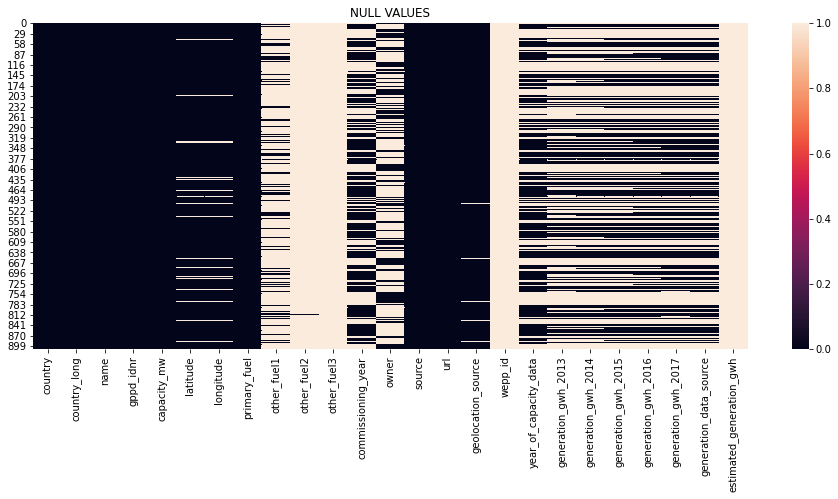

In [724]:
plt.figure(figsize=[16,6])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

the white lines in graph shows a null values of dataset

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Complete basic information of dataset.

## EDA (Exploratory Data Analysis)
### Visualization (Uni Variate analysis)
##### Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1.Analysis through distplot

In [730]:
fe = df[['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

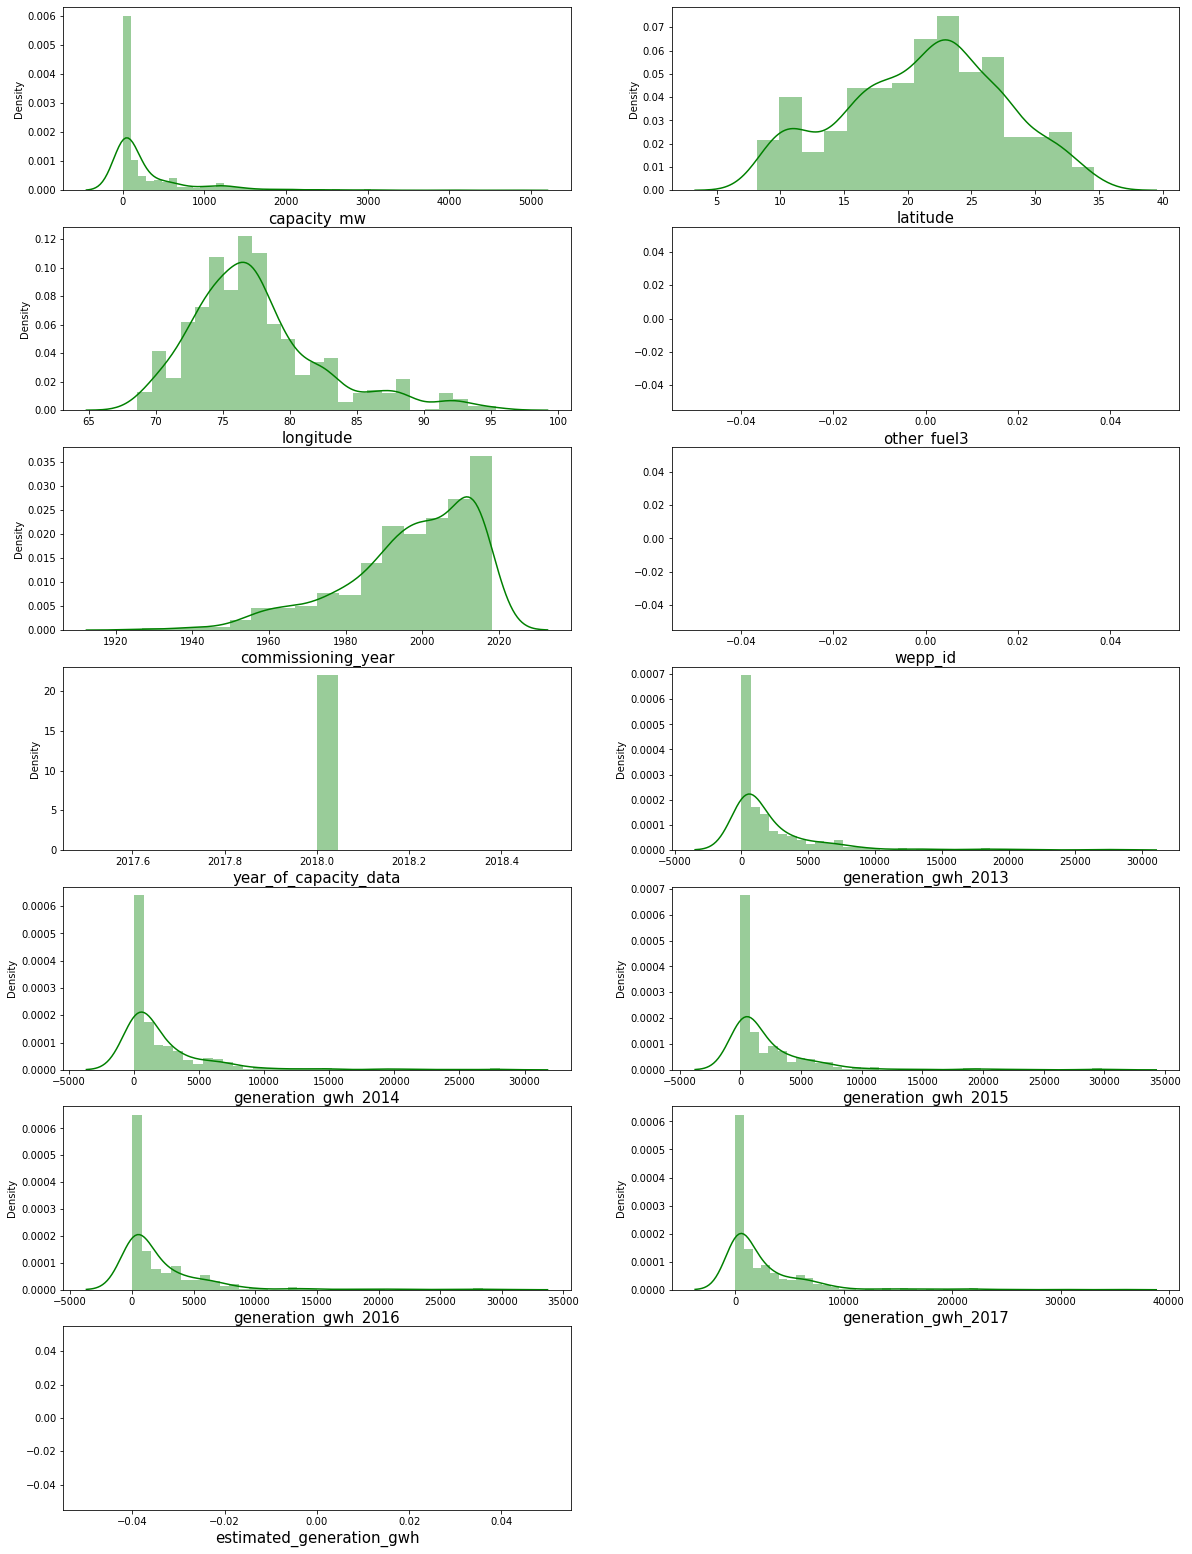

In [731]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

##### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

#### 2. Analysis through boxplot

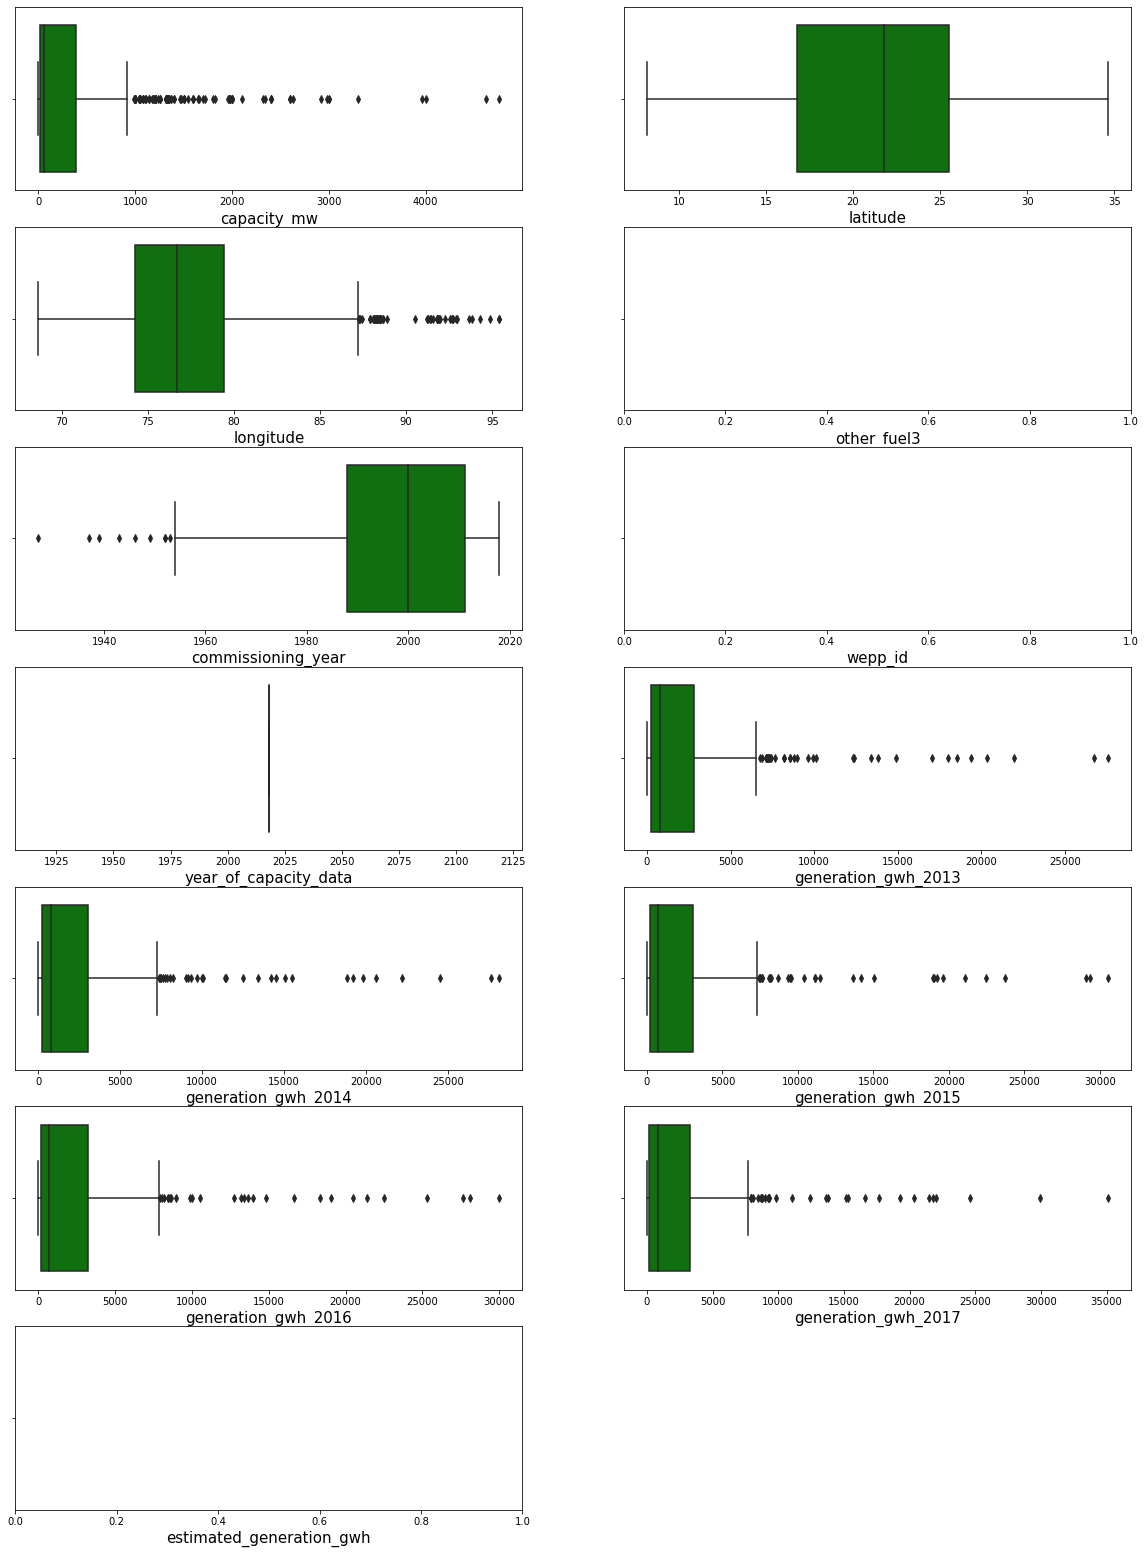

In [732]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.boxplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

##### maximum column contains outliers('latitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

#### 3.Analysis through histplot

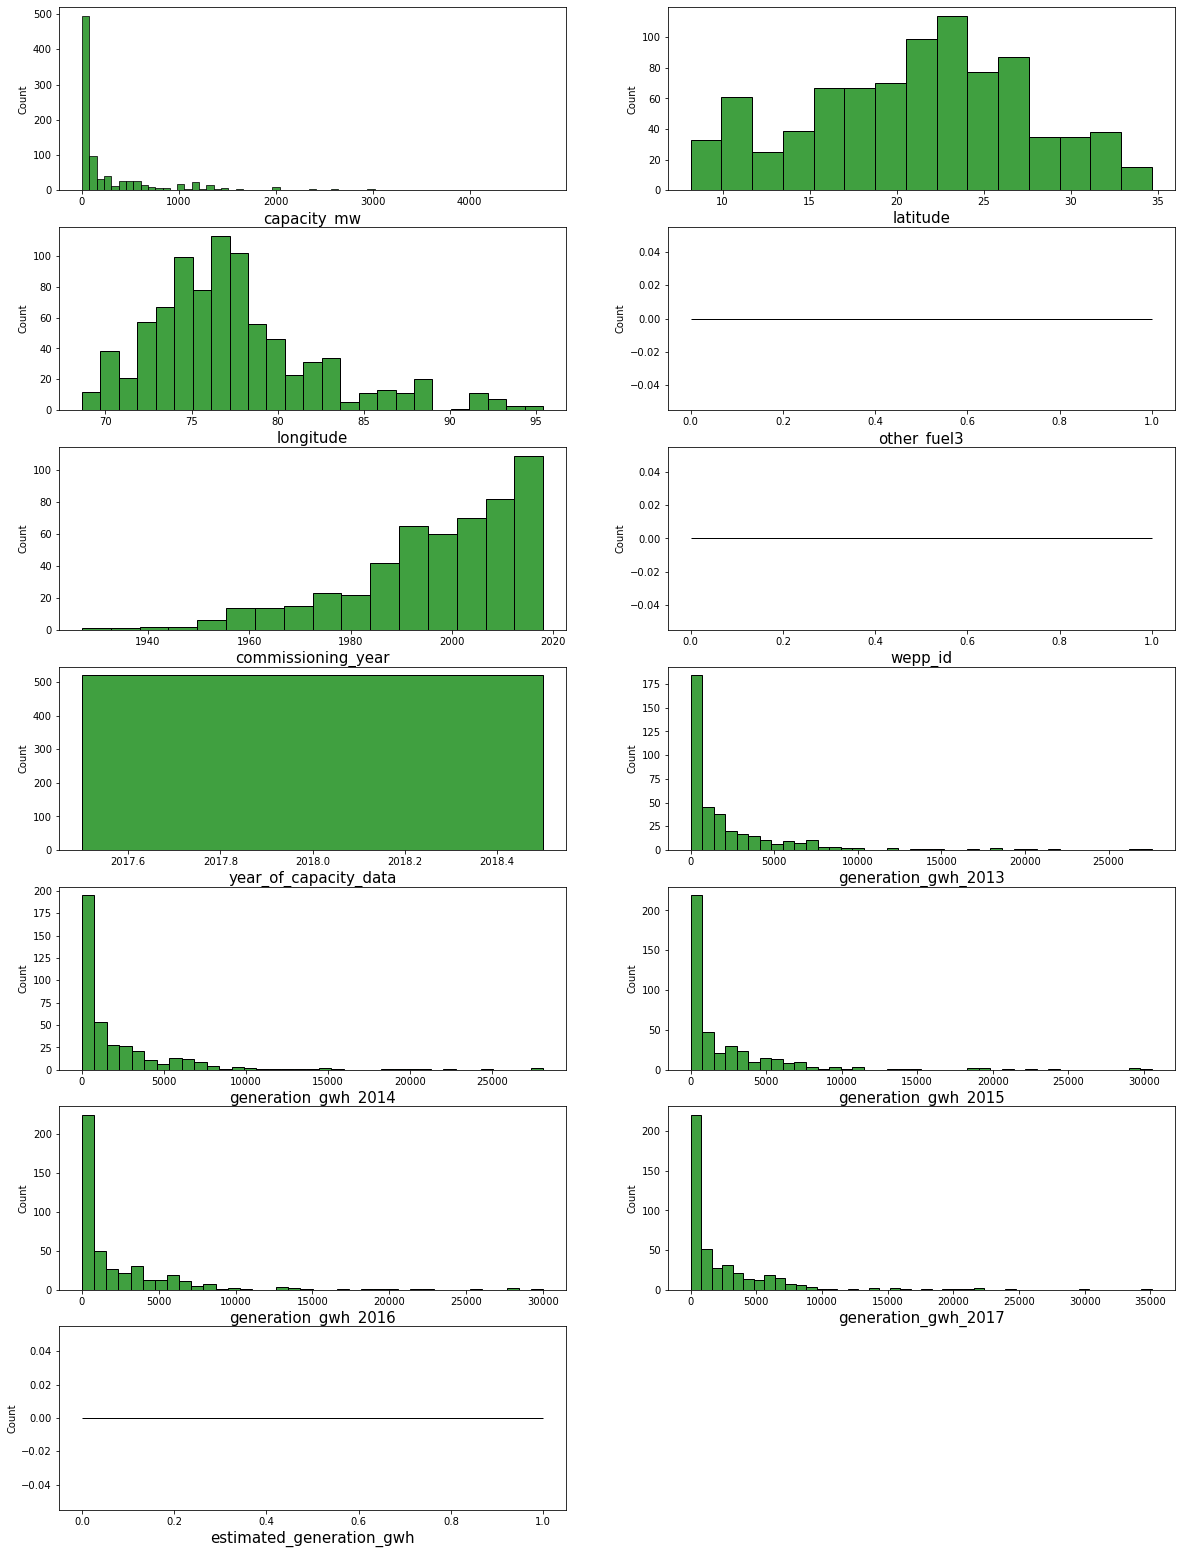

In [733]:
#Relationship Visualizing

plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 35: # as we see there are twentyfive columns in the data
        ax = plt.subplot(15,2,plotnumber)
        sn.histplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

##### maximum column contains skewness('latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017')

## Bi variate analysis
#### Bi variate analysis is works with two variables.

In [734]:
feature = df[['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh']]

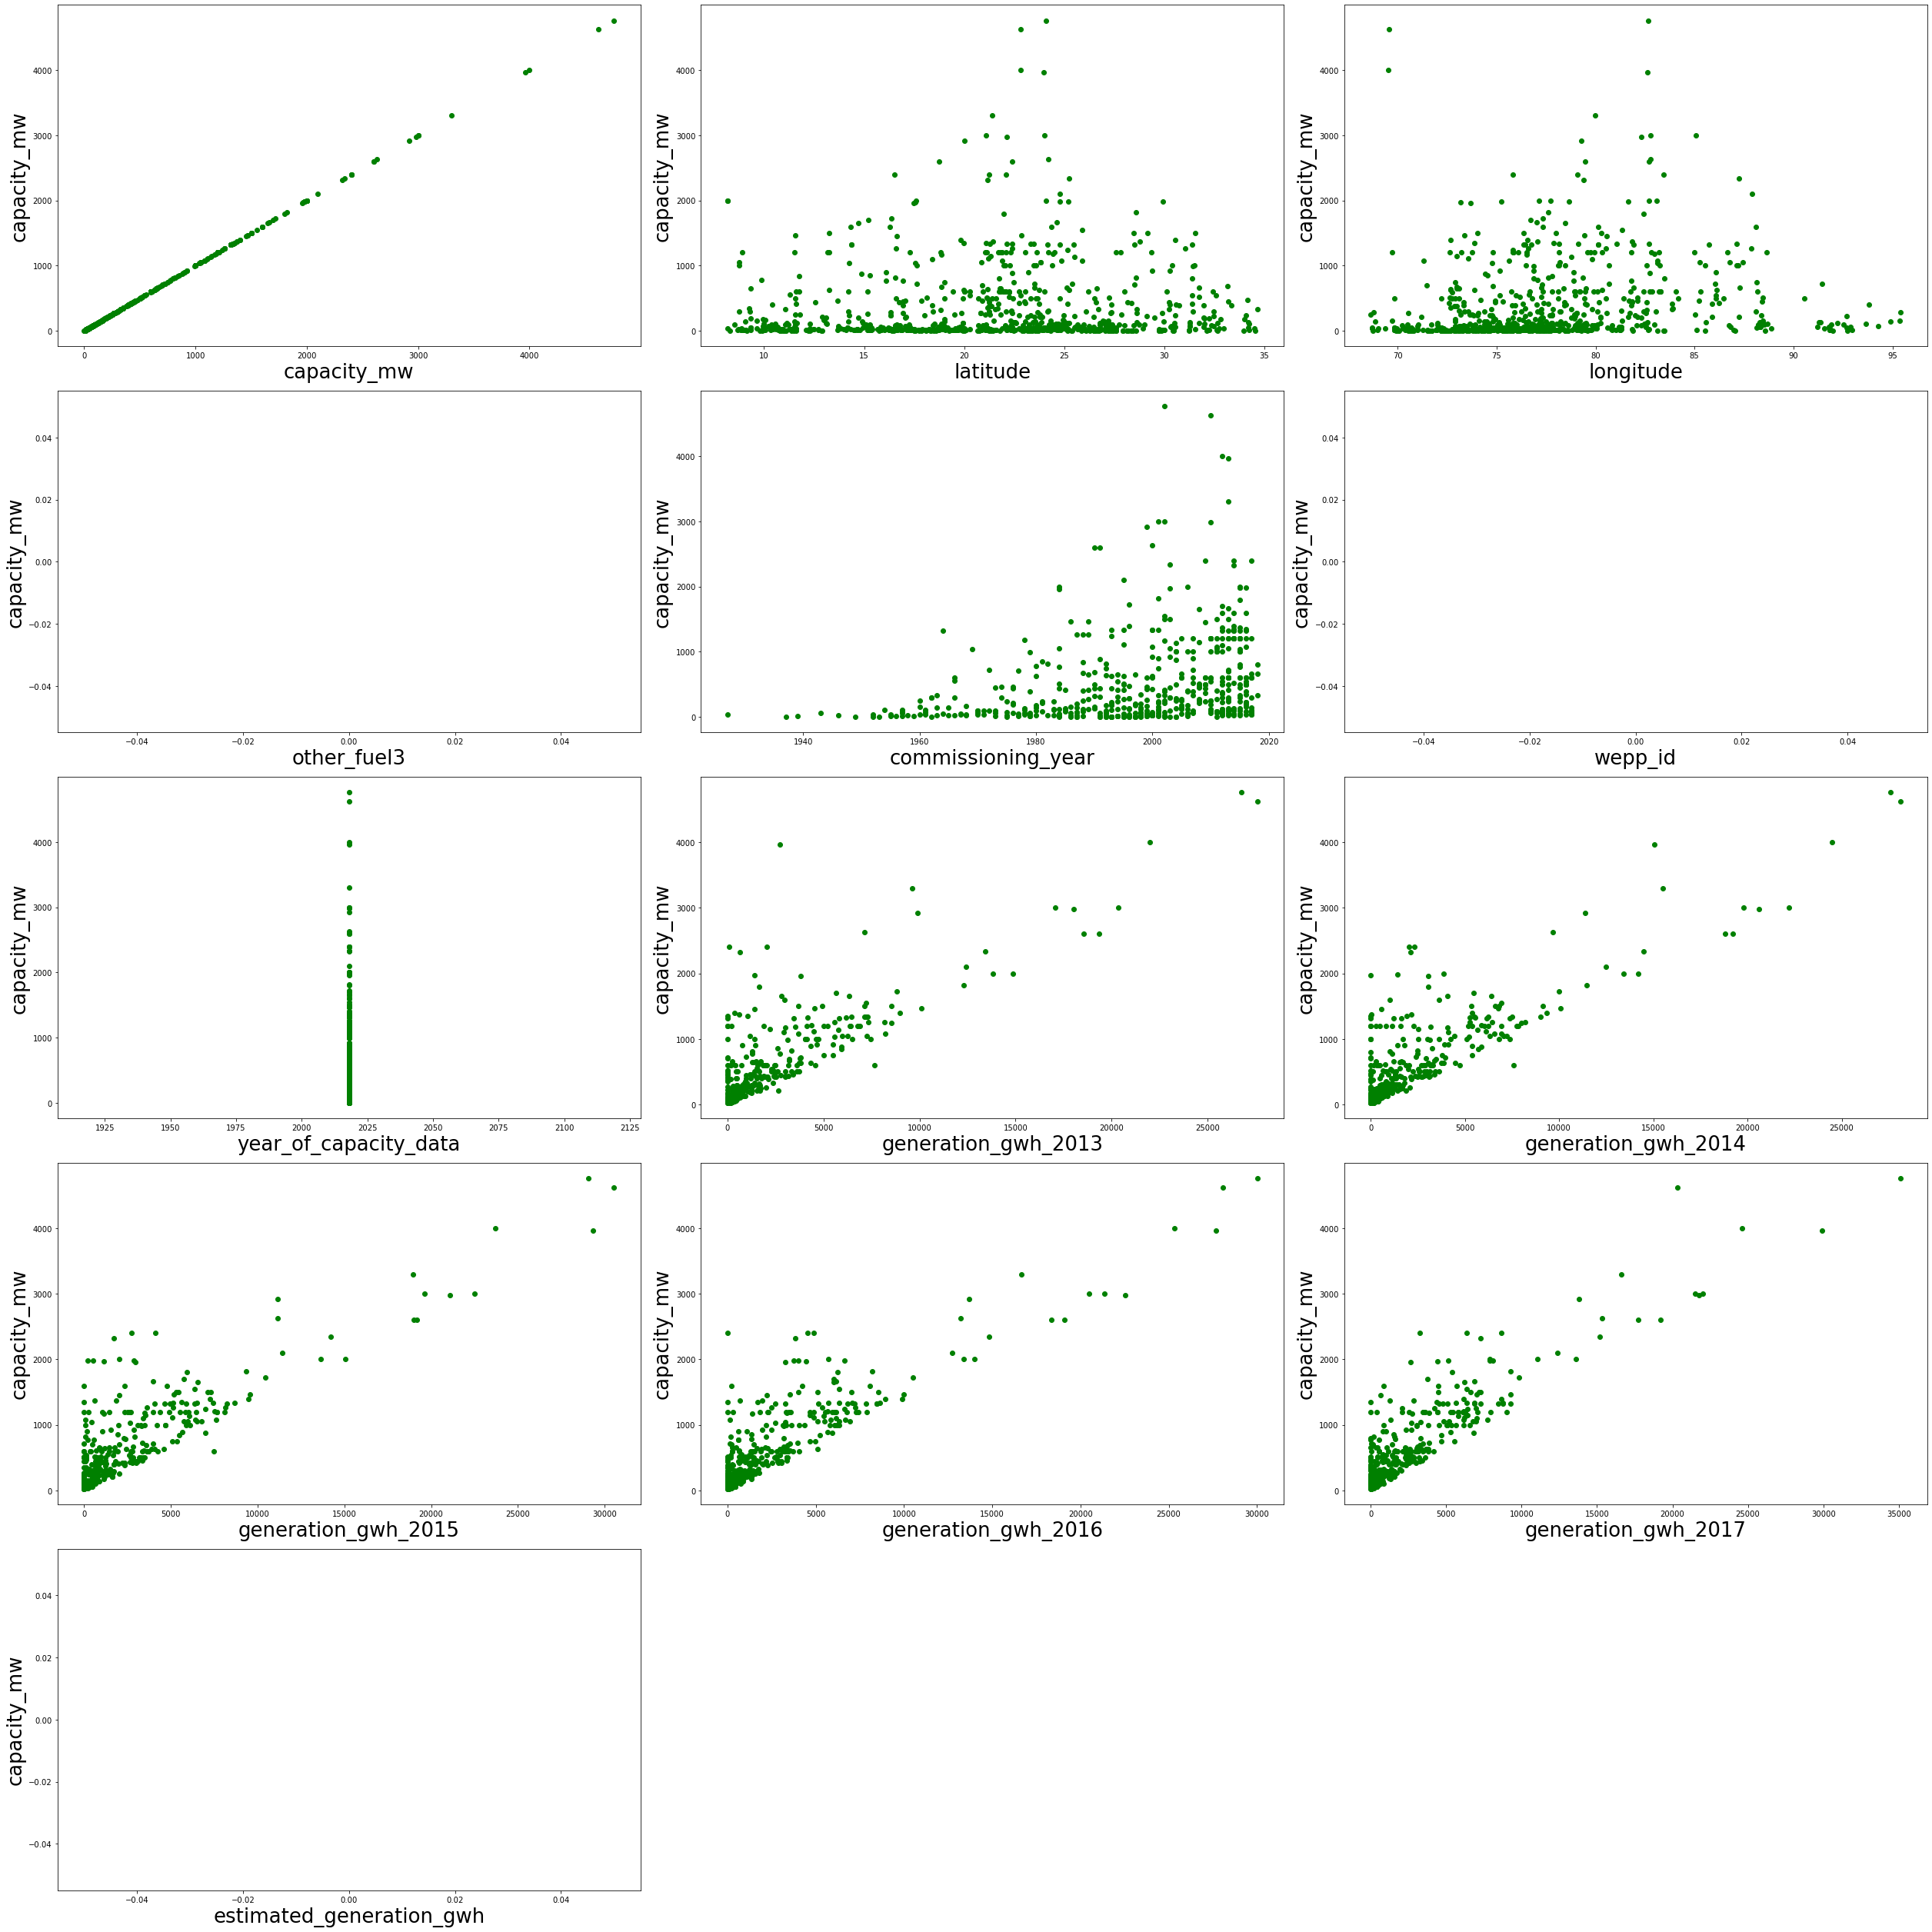

In [735]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['capacity_mw'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('capacity_mw', fontsize=26)
    plotnumber += 1
plt.tight_layout()

##### There are some variables are having some amount of linear relationship with target variable and some are having non linear relationship with target variable.

##### As we see in the plot some outliers are also present in it.

## Multi Variate analysis
#### Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

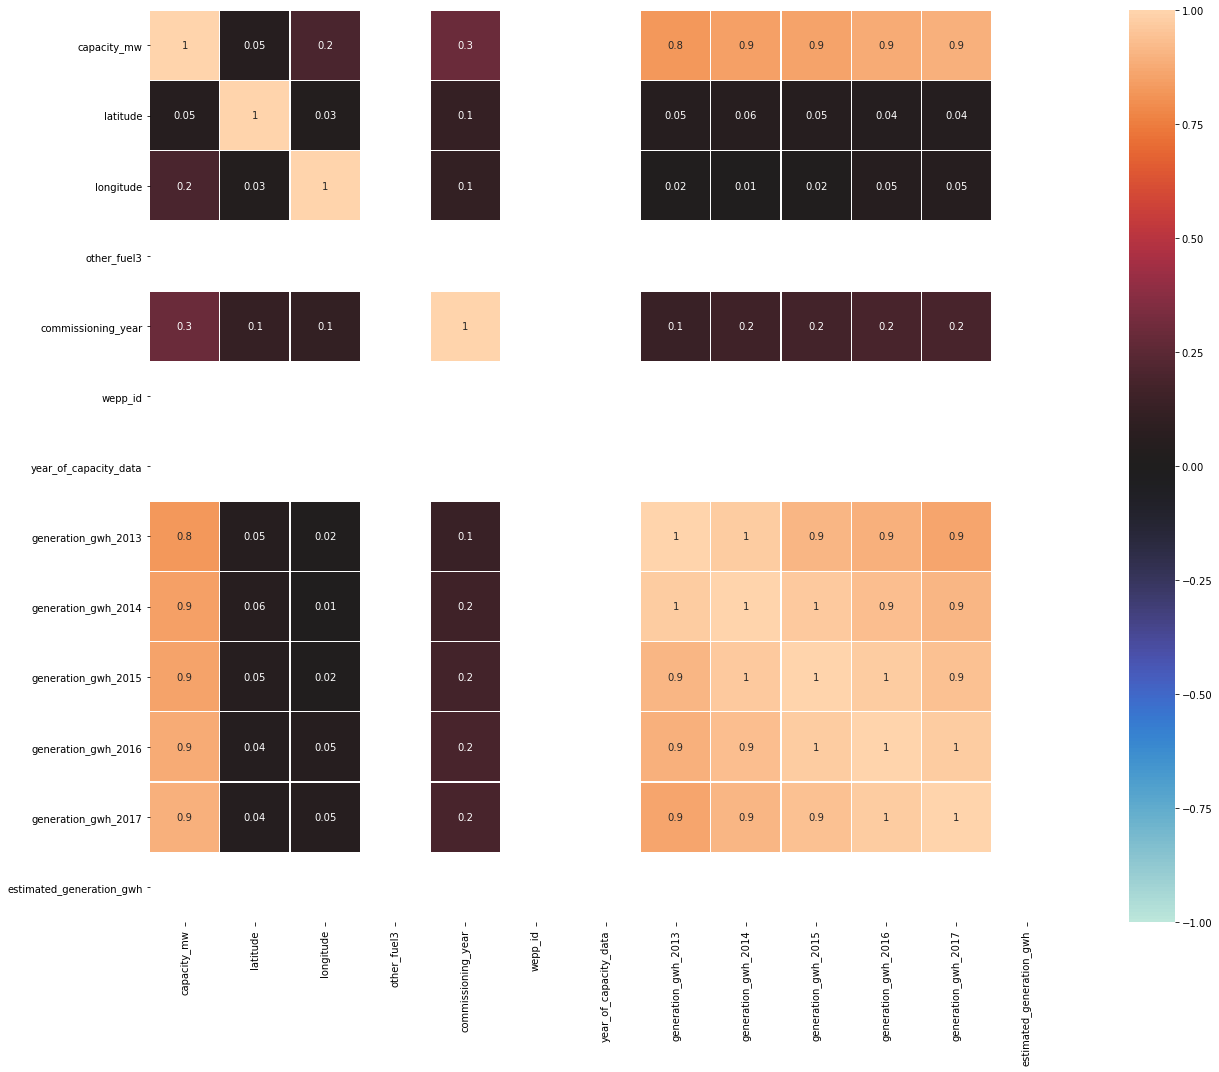

In [736]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

##### As shown in plot  'latitude'  are not having good relationship with target variable and other  input variables are almost having good relation with target variable.

##### latitude is also having poor corelation with target variable

## Find out which columns are positively and negatively correlated with each other

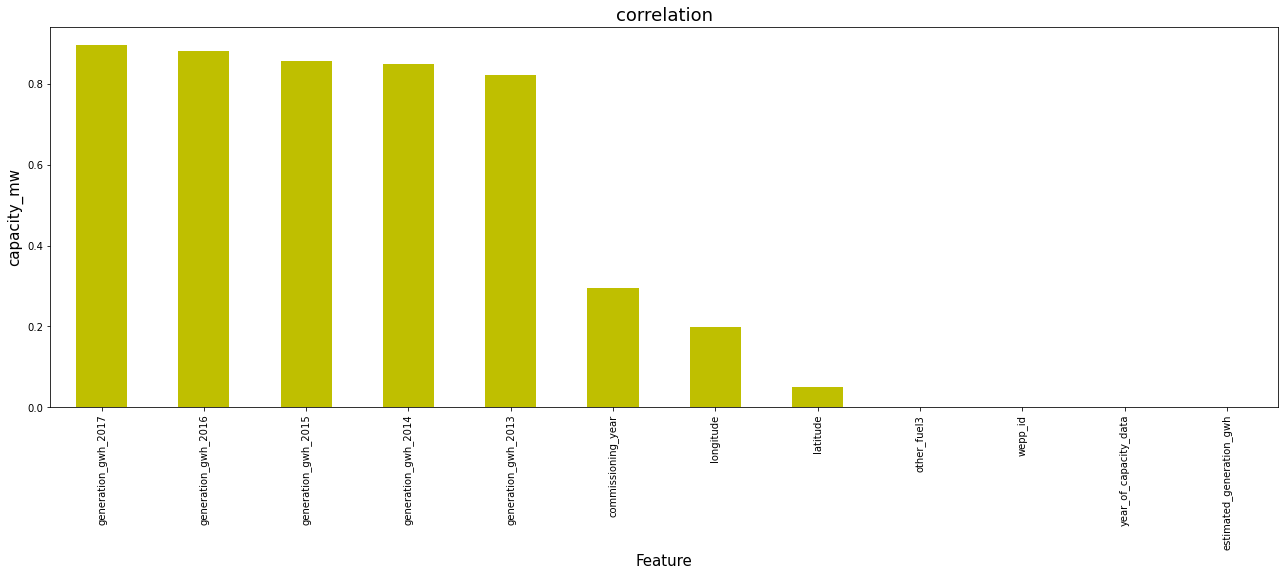

In [737]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('capacity_mw', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

##### As shown in plot all features are positively correlated with target variable. There are no negative correlation in it and other_fuel3, wepp_id, year_of_capacity_data and estimated_generation_gwh are not having any correlation with target variable, so we can drop that column.

#### Correlation with target variable through pairplot

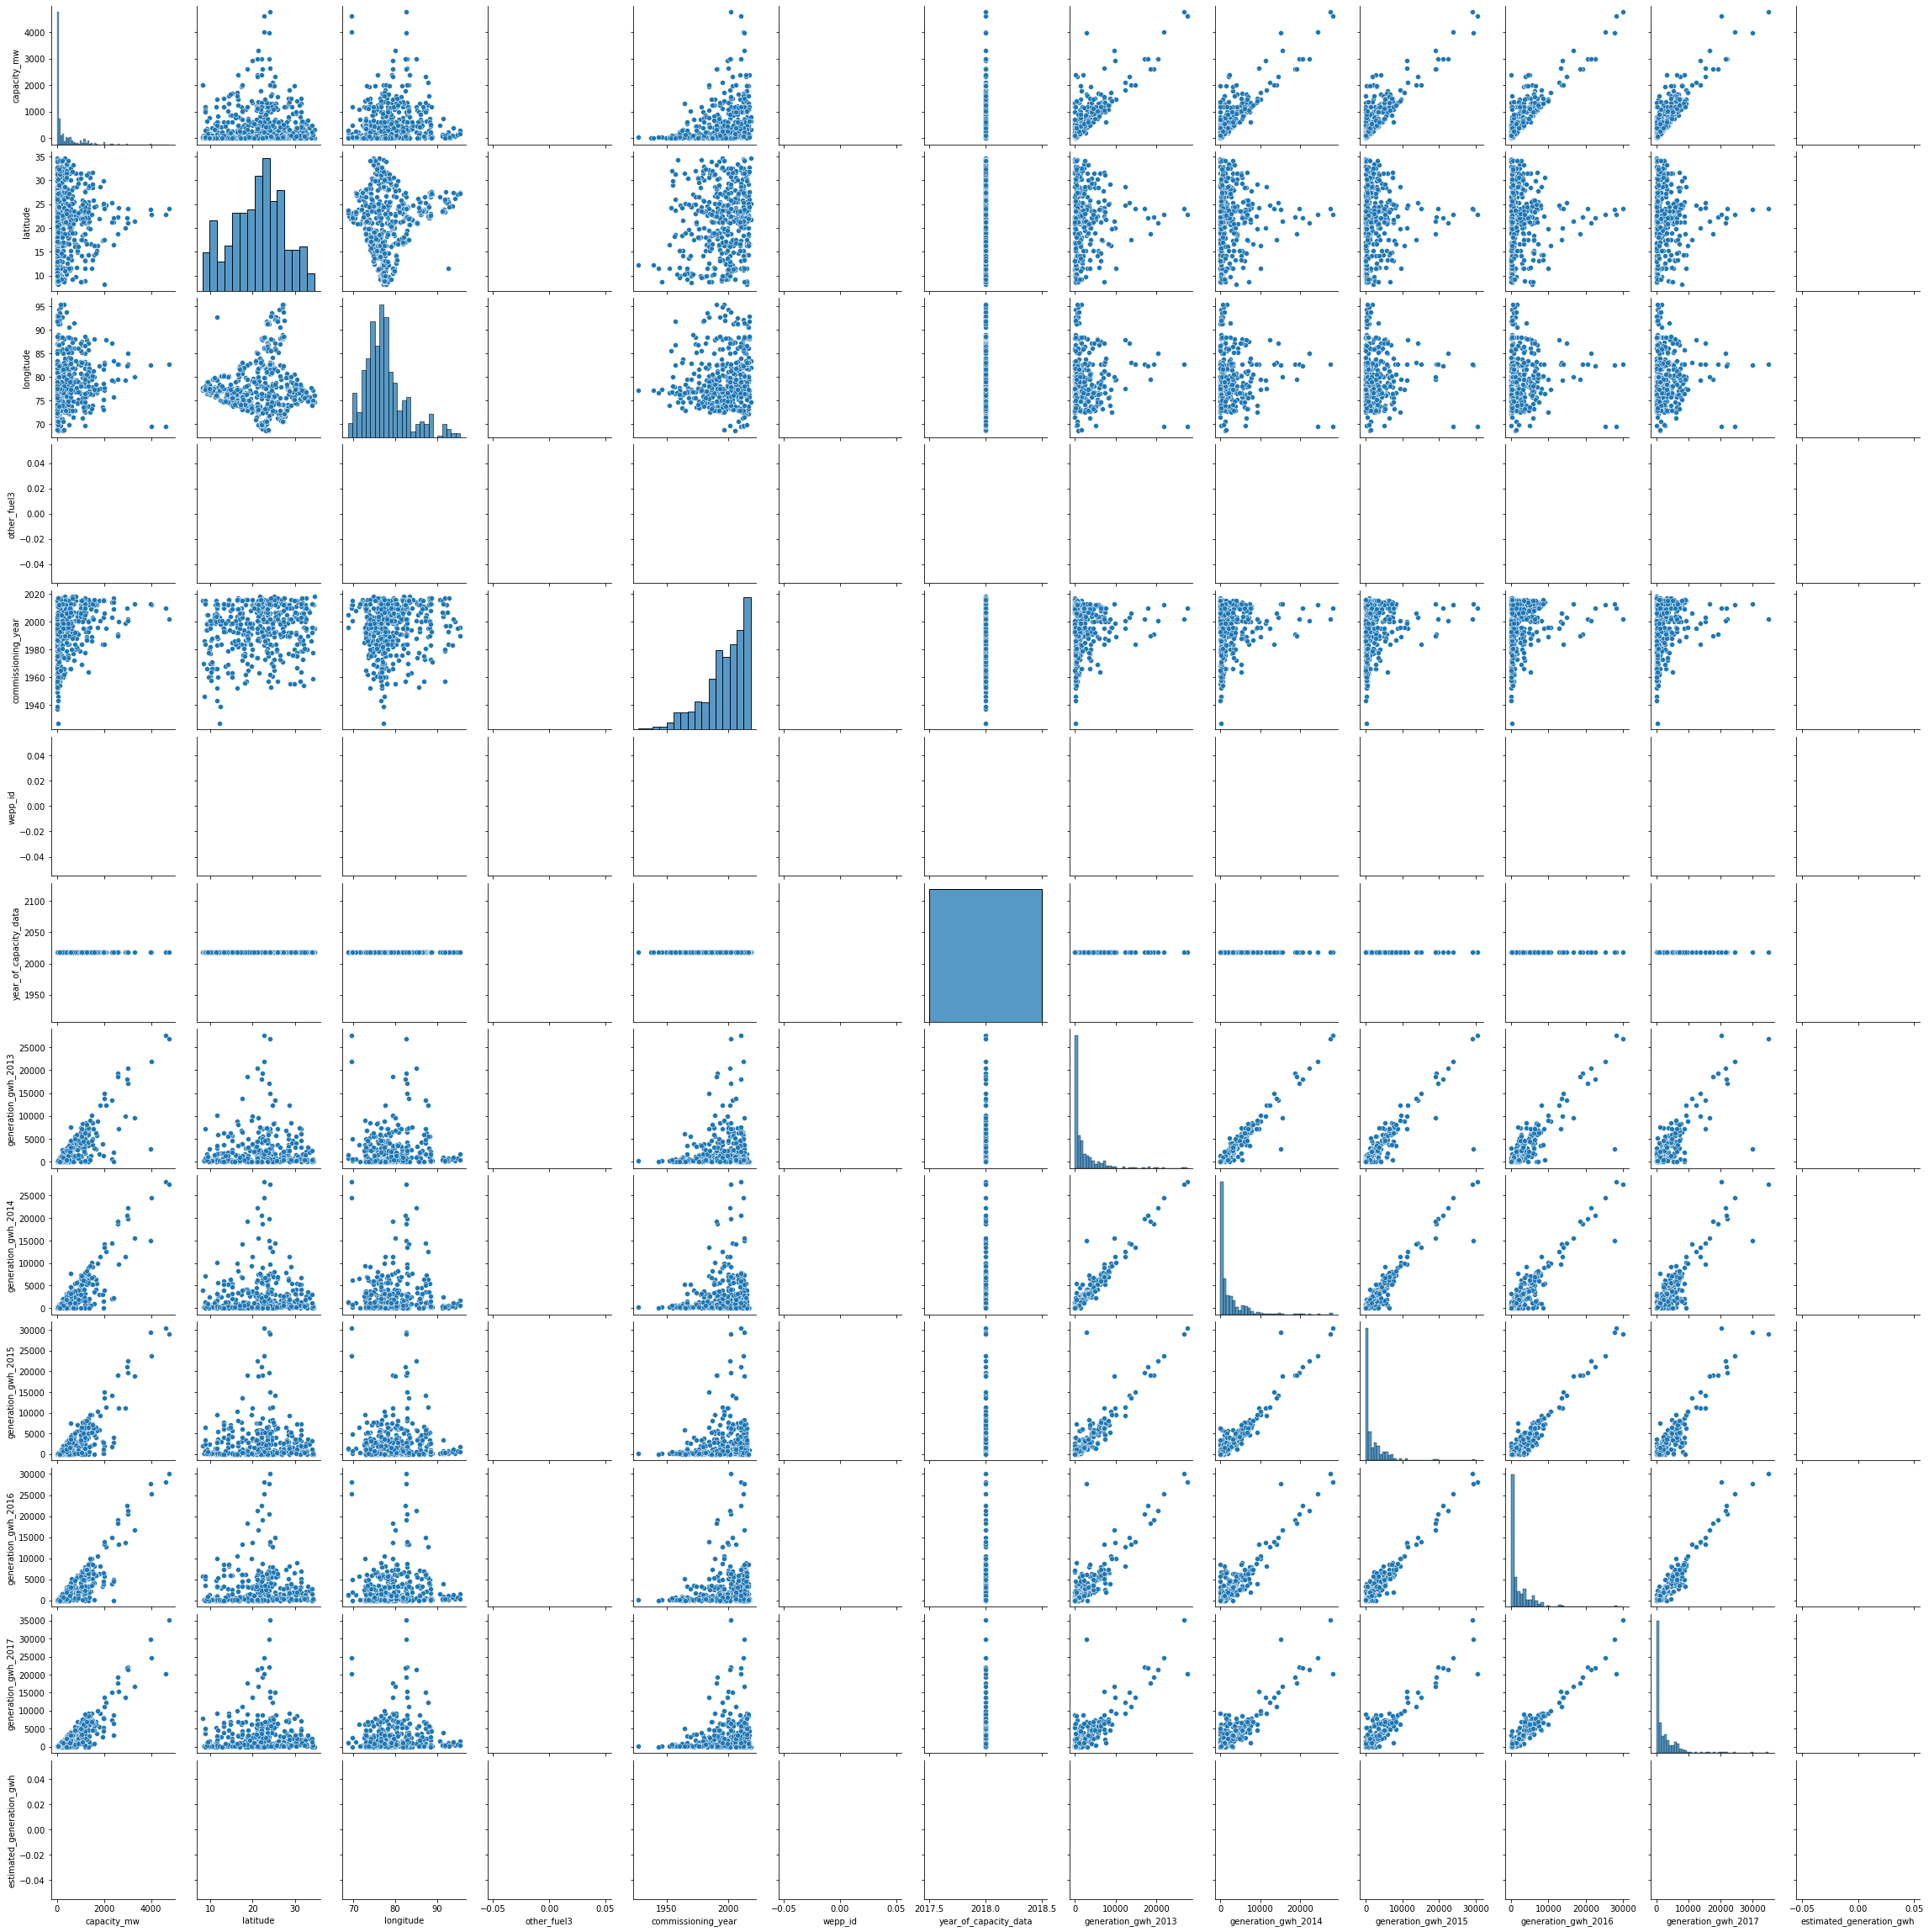

In [565]:
sn.pairplot(df)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

## Handling missing values

In [738]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### 1. latitude

In [739]:
# Check unique values of latitude column
df['latitude'].nunique()

837

In [740]:
837/908 *100

92.18061674008811

latitude is having 92% unique value so we can drop that column.

In [741]:
df=df.drop(['latitude'], axis=1)

#### 2. longitude

In [742]:
# Check unique values of longitude column
df['longitude'].nunique()

828

In [743]:
828/908 *100

91.18942731277532

longitude is having 92% unique value so we can drop that column.

In [744]:
df=df.drop(['longitude'], axis=1)

#### 3. other_fuel1

In [745]:
# Check unique values of other_fuel1 column
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [746]:
709/908 *100

78.08370044052863

other_fuel1 is having 78% missing value so we can drop that column.

In [747]:
df=df.drop(['other_fuel1'], axis=1)

In [748]:
df=df.drop(['other_fuel2'], axis=1)

In [749]:
df=df.drop(['other_fuel3'], axis=1)

#### 4. commissioning_year

In [750]:
# Check unique values of commissioning_year column
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [751]:
df['commissioning_year']= df['commissioning_year'].fillna(df['commissioning_year'].mean())

#### 5. owner

In [752]:
# Check unique values of owner column
df['owner'].value_counts()

Jk Cement ltd                          4
Sterling Agro Industries ltd.          4
Acc Acc ltd                            4
Ujaas Energy Limited                   3
Government of India                    3
                                      ..
Aftaab Solar Private Limited (ASPL)    1
Solaer                                 1
Sepset Construction Limited            1
Karur Textile Park limited             1
Abellon CleanEnergy Limited            1
Name: owner, Length: 280, dtype: int64

In [753]:
df['owner']= df['owner'].fillna(df['owner'].mode()[0])

#### 6. geolocation_source

In [754]:
# Check unique values of geolocation_source column
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [755]:
df['geolocation_source']= df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

#### 7. year_of_capacity_data

In [756]:
# Check unique values of year_of_capacity_data column
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [757]:
df=df.drop(['year_of_capacity_data'], axis=1)

#### 8.generation_gwh_2013

In [758]:
# Check unique values of generation_gwh_2013 column
df['generation_gwh_2013'].value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [764]:
df['generation_gwh_2013']= df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())

#### 9. generation_gwh_2014

In [765]:
df['generation_gwh_2014']= df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

#### 10. generation_gwh_2015

In [766]:
df['generation_gwh_2015']= df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

#### 11. generation_gwh_2016

In [767]:
df['generation_gwh_2016']= df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

#### 12. generation_gwh_2017

In [768]:
df['generation_gwh_2017']= df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

#### 13. generation_data_source

In [769]:
# Check unique values of generation_gwh_2013 column
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [770]:
df['generation_data_source']= df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

##### After filling missing values the dataset is like 

In [771]:
df

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,1996.876894,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,Coal,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,797.063475,805.760000,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,1996.876894,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,Wind,1996.876894,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,Coal,1996.876894,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,Central Electricity Authority,NaN


after filling missing values the dataset looks like this and rest columns will be drop because of poor correlation with target variable

## Encoding/dropping columns

In [772]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
primary_fuel                 object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [773]:
df['country'].unique()

array(['IND'], dtype=object)

In [774]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

as shown in above country column_long is having all 908 similar values so we can drop that column

In [775]:
df=df.drop(['country'], axis=1)

#### 2. country_long

In [776]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [777]:
#drop country_long column 
df=df.drop(['country_long'], axis=1)

#### 3. name

In [778]:
df['name'].value_counts()

RAJASHREE CEMENT             1
HIRAKUD I&II                 1
YELHANKA (DG)                1
HZL Nandurbar Maharashtra    1
CORE GREEN SUGAR             1
                            ..
BANDAKHAR TPP                1
THAMMINAPATNAM TPP           1
Tiruppur                     1
Gujurat Solar On             1
KALLUR GRINDING              1
Name: name, Length: 908, dtype: int64

In [779]:
#drop name column 
df=df.drop(['name'], axis=1)

#### 4. gppd_idnr

In [780]:
df['gppd_idnr'].value_counts()

WRI1026209    1
WRI1026197    1
IND0000056    1
IND0000278    1
IND0000118    1
             ..
IND0000396    1
WRI1026216    1
WRI1026164    1
IND0000281    1
WRI1026072    1
Name: gppd_idnr, Length: 908, dtype: int64

In [781]:
#drop gppd_idnr column 
df=df.drop(['gppd_idnr'], axis=1)

#### 5.generation_data_source 

In [782]:
df['generation_data_source'].value_counts()

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [783]:
#drop generation_data_source column 
df=df.drop(['generation_data_source'], axis=1)

#### 6.DROP wepp_id, estimated_generation_gwh columns because it is having all null values

In [784]:
#drop wepp_id column 
df=df.drop(['wepp_id'], axis=1)

In [785]:
#drop estimated_generation_gwh column 
df=df.drop(['estimated_generation_gwh'], axis=1)

In [786]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [787]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [788]:
df.dtypes

capacity_mw            float64
primary_fuel             int32
commissioning_year     float64
owner                    int32
source                   int32
url                      int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

as shown above all columns are encoded now.

## Visualization of all input variables correlation with targate variable after encoding

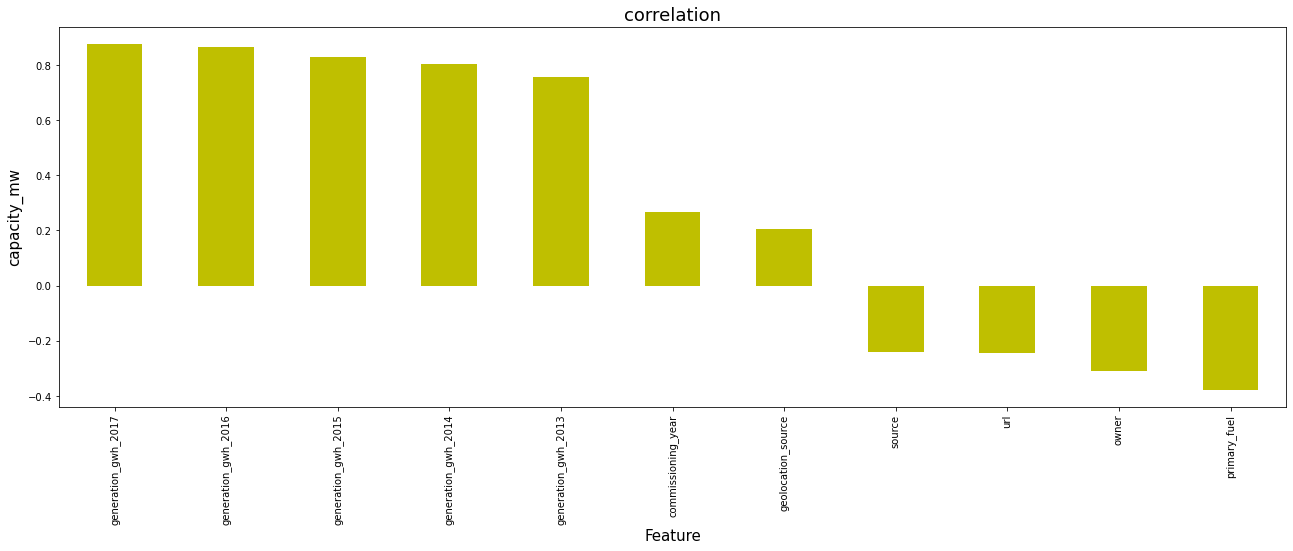

In [789]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('capacity_mw', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

## Remove outliers
#### Now we found the outliers and skewness in some variables.Removing outliers first.

### 1.Outlier removal using Zscore

In [790]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (908, 12)
shape after          : (871, 12)
Percentage Loss      : 0.040748898678414094


4.04% data will loss after applying Zscore technique.

In [791]:
(871/908)*100

95.92511013215858

#### 95.92% data remains in dataset after using zscore technique

In [792]:
new_df.describe()

,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,272.048635,3.258324,1997.754558,58.284730,44.750861,95.977038,1.722158,1157.859169,1207.253789,1168.221065,1218.748314,1319.756370
std,436.399866,2.305635,11.261768,83.546803,45.330801,71.422537,0.688796,1387.986606,1474.296383,1530.615734,1603.435450,1681.399035
min,0.000000,0.000000,1958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
50%,54.000000,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,330.000000,6.000000,2003.000000,104.500000,38.500000,121.500000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
max,2400.000000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,8965.595000,9335.000000,9453.000000,9887.200000,9271.610000


### 2. Outlier Removing using IQR
#### from boxplot in EDA, we came to know that outliers present in following columns.
##### Visualize data again to check outliers are present at low side or high side

In [793]:
df2 = df

In [794]:
#features in which outliers are detected
fe = df2[['commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']]

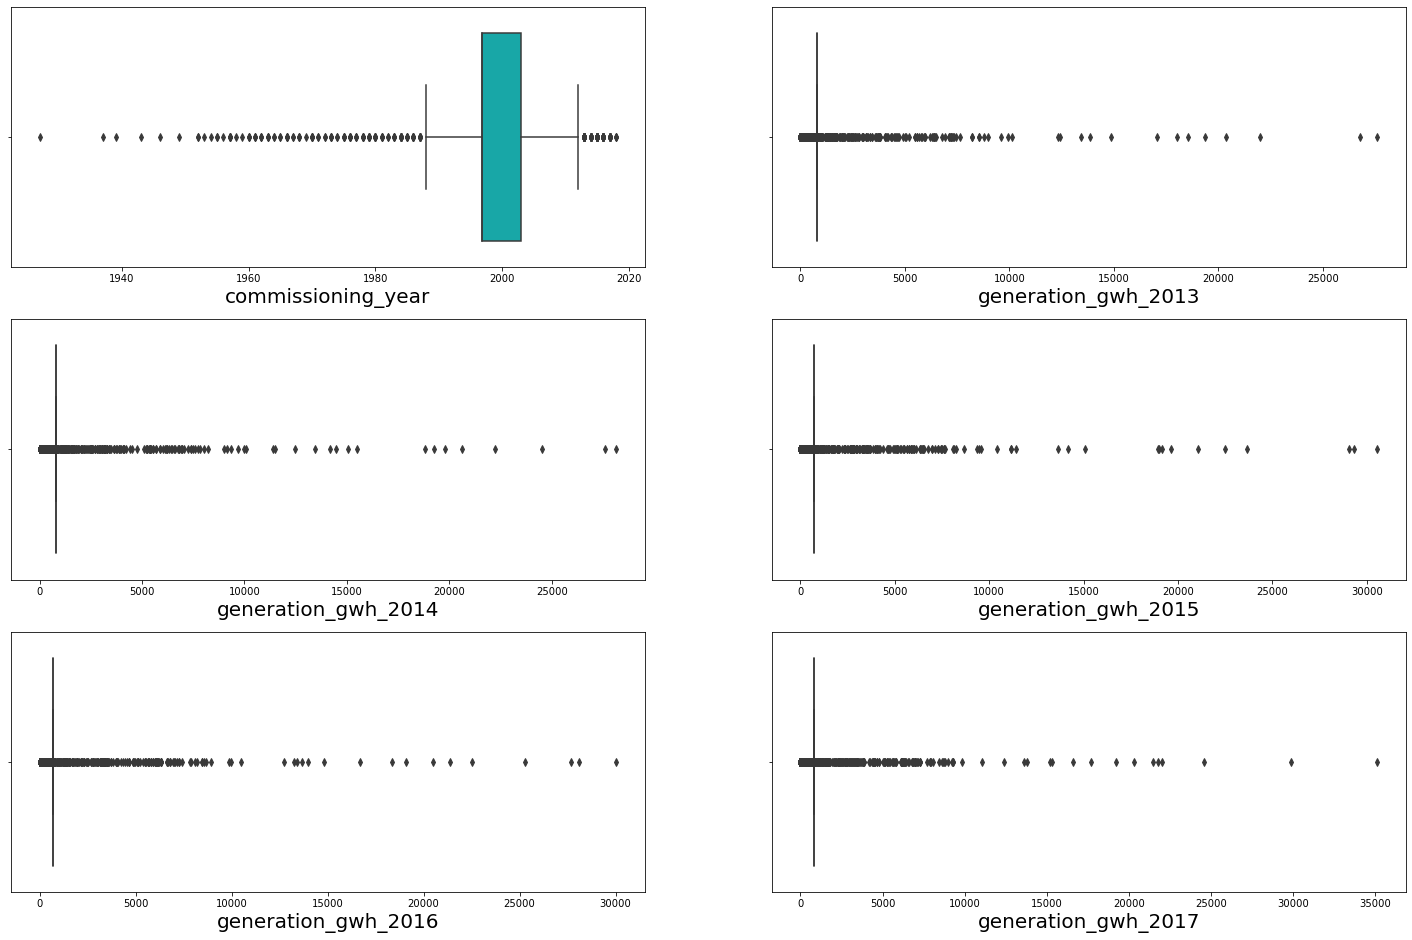

In [795]:
plt.figure(figsize=(25,45))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(8,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [796]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [797]:
df2.describe()

,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,1996.876894,56.113436,43.823789,94.429515,1.733480,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,2.281339,12.994825,82.501086,44.624092,70.352824,0.676835,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
50%,60.000000,3.000000,1996.876894,5.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,6.000000,2003.000000,95.250000,29.250000,115.250000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700
max,4760.000000,7.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## Outlier detection formula

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)

In [798]:
#Check the Outliers for commissioning_year
#Remove outliers from lower side so, use lower side formula

commissioning_year_out = (q3.commissioning_year + (1.5*(iqr.commissioning_year)))
commissioning_year_out

2012.184659090909

In [799]:
index_out = np.where(df2['commissioning_year'] > commissioning_year_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.760000,701.02725,716.728350,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.760000,701.02725,716.728350,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.760000,701.02725,716.728350,807.6017
3,3,135.0,2,2004.000000,5,22,58,2,631.777928,617.789264,843.74700,886.004428,663.7745
4,5,250.0,1,2005.000000,5,22,58,2,821.798000,1153.421000,1208.85200,1175.765000,1147.9130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.000000,0.00000,0.000000,807.6017
795,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.760000,701.02725,716.728350,807.6017
796,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.760000,701.02725,716.728350,807.6017
797,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.760000,701.02725,716.728350,807.6017


after removing outliers 568 rows will remains in dataframe.

In [800]:
#Check the Outliers for generation_gwh_2013
#Remove outliers from lower side so, use lower side formula

generation_gwh_2013_out = (q3.generation_gwh_2013 + (1.5*(iqr.generation_gwh_2013)))
generation_gwh_2013_out

797.0634749999999

In [801]:
index_out = np.where(df2['generation_gwh_2013'] > generation_gwh_2013_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.760000,701.02725,716.728350,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.760000,701.02725,716.728350,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.760000,701.02725,716.728350,807.6017
3,3,135.0,2,2004.000000,5,22,58,2,631.777928,617.789264,843.74700,886.004428,663.7745
4,6,60.0,3,1970.000000,5,22,58,2,147.568450,157.558250,152.19520,61.421350,89.6296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.000000,0.00000,0.000000,807.6017
615,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.760000,701.02725,716.728350,807.6017
616,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.760000,701.02725,716.728350,807.6017
617,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.760000,701.02725,716.728350,807.6017


after removing outliers 568 rows will remains in dataframe.

In [802]:
#Check the Outliers for generation_gwh_2014
#Remove outliers from lower side so, use lower side formula

generation_gwh_2014_out = (q3.generation_gwh_2014 + (1.5*(iqr.generation_gwh_2014)))
generation_gwh_2014_out

805.76

In [803]:
index_out = np.where(df2['generation_gwh_2014'] > generation_gwh_2014_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.760000,701.02725,716.728350,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.760000,701.02725,716.728350,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.760000,701.02725,716.728350,807.6017
3,3,135.0,2,2004.000000,5,22,58,2,631.777928,617.789264,843.74700,886.004428,663.7745
4,6,60.0,3,1970.000000,5,22,58,2,147.568450,157.558250,152.19520,61.421350,89.6296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.000000,0.00000,0.000000,807.6017
610,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.760000,701.02725,716.728350,807.6017
611,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.760000,701.02725,716.728350,807.6017
612,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.760000,701.02725,716.728350,807.6017


after removing outliers 568 rows will remains in dataframe.

In [804]:
#Check the Outliers for generation_gwh_2015
#Remove outliers from lower side so, use lower side formula

generation_gwh_2015_out = (q3.generation_gwh_2015 + (1.5*(iqr.generation_gwh_2015)))
generation_gwh_2015_out

701.02725

In [805]:
index_out = np.where(df2['generation_gwh_2015'] > generation_gwh_2015_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.76000,701.02725,716.72835,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.76000,701.02725,716.72835,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.76000,701.02725,716.72835,807.6017
3,6,60.0,3,1970.000000,5,22,58,2,147.568450,157.55825,152.19520,61.42135,89.6296
4,8,290.0,3,2004.000000,5,22,58,2,504.813250,480.59495,144.43420,402.02975,439.3721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.00000,0.00000,0.00000,807.6017
601,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.76000,701.02725,716.72835,807.6017
602,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.76000,701.02725,716.72835,807.6017
603,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.76000,701.02725,716.72835,807.6017


after removing outliers 568 rows will remains in dataframe.

In [806]:
#Check the Outliers for generation_gwh_2016
#Remove outliers from lower side so, use lower side formula

generation_gwh_2016_out = (q3.generation_gwh_2016 + (1.5*(iqr.generation_gwh_2016)))
generation_gwh_2016_out

716.7283500000002

In [807]:
index_out = np.where(df2['generation_gwh_2016'] > generation_gwh_2016_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.76000,701.02725,716.72835,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.76000,701.02725,716.72835,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.76000,701.02725,716.72835,807.6017
3,6,60.0,3,1970.000000,5,22,58,2,147.568450,157.55825,152.19520,61.42135,89.6296
4,8,290.0,3,2004.000000,5,22,58,2,504.813250,480.59495,144.43420,402.02975,439.3721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.00000,0.00000,0.00000,807.6017
599,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.76000,701.02725,716.72835,807.6017
600,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.76000,701.02725,716.72835,807.6017
601,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.76000,701.02725,716.72835,807.6017


after removing outliers 568 rows will remains in dataframe.

In [808]:
#Check the Outliers for generation_gwh_2017
#Remove outliers from lower side so, use lower side formula

generation_gwh_2017_out = (q3.generation_gwh_2017 + (1.5*(iqr.generation_gwh_2017)))
generation_gwh_2017_out

807.6016999999998

In [809]:
index_out = np.where(df2['generation_gwh_2017'] > generation_gwh_2017_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,6,2011.000000,229,109,128,1,797.063475,805.76000,701.02725,716.72835,807.6017
1,1,98.0,1,1996.876894,258,174,173,2,797.063475,805.76000,701.02725,716.72835,807.6017
2,2,39.2,7,1996.876894,2,21,205,2,797.063475,805.76000,701.02725,716.72835,807.6017
3,6,60.0,3,1970.000000,5,22,58,2,147.568450,157.55825,152.19520,61.42135,89.6296
4,8,290.0,3,2004.000000,5,22,58,2,504.813250,480.59495,144.43420,402.02975,439.3721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,902,106.6,5,1993.000000,5,22,58,2,20.900000,0.00000,0.00000,0.00000,807.6017
597,904,3.0,6,1996.876894,114,77,22,0,797.063475,805.76000,701.02725,716.72835,807.6017
598,905,25.5,7,1996.876894,5,21,260,2,797.063475,805.76000,701.02725,716.72835,807.6017
599,906,80.0,1,1996.876894,91,59,82,2,797.063475,805.76000,701.02725,716.72835,807.6017


after removing outliers 568 rows will remains in dataframe.

#### After removing outliers from only in all columns using IQR technique we can see there are only 685 rows will remains in dataset which is very less than zscore technique.

In [810]:
568/908 * 100

62.55506607929515

##### 62.55% data remains after using IQR technique in one column which is less than zscore technique.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique¶

## Check the skewness and remove that

In [811]:
new_df.skew()

capacity_mw            2.166707
primary_fuel           0.426725
commissioning_year    -0.830057
owner                  1.303090
source                 1.762555
url                    1.447427
geolocation_source    -2.091515
generation_gwh_2013    3.131242
generation_gwh_2014    2.974343
generation_gwh_2015    2.749239
generation_gwh_2016    2.669984
generation_gwh_2017    2.564321
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

1. commissioning_year
2. generation_gwh_2013
3. generation_gwh_2014
4. generation_gwh_2015
5. generation_gwh_2016
6. generation_gwh_2017

### Check outliers datatype. If data types of skewed column is catogorical than no need to remove skewness from that variable.

## Apply yeo-johnson Power transformation to remove skewness
#### In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data and .

In [812]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df['commissioning_year'] = scaler.fit_transform(new_df['commissioning_year'].values.reshape(-1,1))
new_df['generation_gwh_2013'] = scaler.fit_transform(new_df['generation_gwh_2013'].values.reshape(-1,1))
new_df['generation_gwh_2014'] = scaler.fit_transform(new_df['generation_gwh_2014'].values.reshape(-1,1))
new_df['generation_gwh_2015'] = scaler.fit_transform(new_df['generation_gwh_2015'].values.reshape(-1,1))
new_df['generation_gwh_2016'] = scaler.fit_transform(new_df['generation_gwh_2016'].values.reshape(-1,1))
new_df['generation_gwh_2017'] = scaler.fit_transform(new_df['generation_gwh_2017'].values.reshape(-1,1))

In [813]:
new_df.skew()

capacity_mw            2.166707
primary_fuel           0.426725
commissioning_year     0.026983
owner                  1.303090
source                 1.762555
url                    1.447427
geolocation_source    -2.091515
generation_gwh_2013    0.280012
generation_gwh_2014    0.234600
generation_gwh_2015    0.167402
generation_gwh_2016    0.150835
generation_gwh_2017    0.128724
dtype: float64

#### we can see skewness of all contineous columns removed.

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

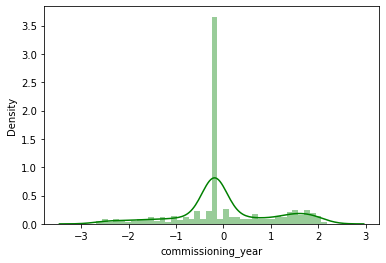

In [814]:
sn.distplot(new_df["commissioning_year"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

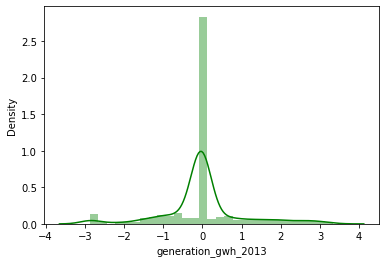

In [815]:
sn.distplot(new_df["generation_gwh_2013"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

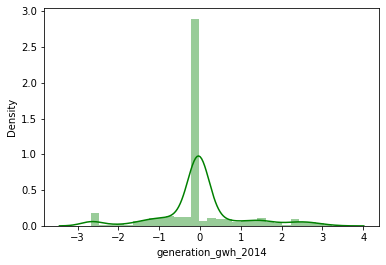

In [816]:
sn.distplot(new_df["generation_gwh_2014"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

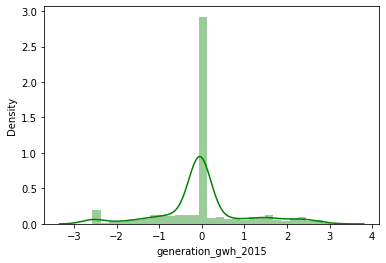

In [817]:
sn.distplot(new_df["generation_gwh_2015"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

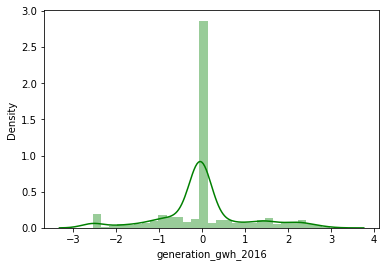

In [818]:
sn.distplot(new_df["generation_gwh_2016"], color = 'g')     

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

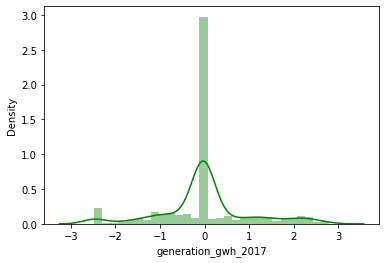

In [819]:
sn.distplot(new_df["generation_gwh_2017"], color = 'g')     

As shown in plot skewness removes after using power transformation skewness removes.

## Seperating the columns into featuers and target:

#### x= features, y=Target 

In [820]:
x = new_df.drop(columns = 'capacity_mw', axis=1)
y = new_df['capacity_mw']

## Scalling technique

In [821]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [822]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,3.612830,primary_fuel
1,1.144758,commissioning_year
2,3.213768,owner
3,3.896256,source
4,2.523144,url
5,2.917224,geolocation_source
6,5.485496,generation_gwh_2013
7,7.240495,generation_gwh_2014
8,6.143903,generation_gwh_2015
9,9.587872,generation_gwh_2016


as we have saw in the table vif value is not greater than 10 for many columns, so its safe to proceed further

In [823]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [824]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7819201808911461 on Random_state  50


In [855]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 50)

# 1.Linear Regression Model

In [827]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [828]:
pred_test=Lr.predict(x_test)

In [829]:
print(r2_score(y_test,pred_test))

0.6380411039227427


## Cross Validation of Linear Regression 

In [830]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.547746954270935

## Regularization 

In [831]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [832]:
ls = Lasso(alpha = 10, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.6317513207876371

In [833]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5631314120295811

###### The r2 score for linear regression model is : 63.17%
###### Cross validation score for linear regression is : 56.31%

# 2.Random Forest Regression 

In [834]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [835]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  87.30042261767534
Cross Val Score:  78.25035272538847


###### The r2 score for Random Forest Regressor model is : 87.30%
###### Cross validation score for Random Forest Regressor is : 78.25%

## 3.Decision Tree Regressor

In [845]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [837]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.7752043747062992


In [838]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5829338544154392

###### The r2 score for Decision tree regression model is : 77.52%
###### Cross validation score for Decision tree regression is : 58.29% 

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 6.86%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 9.05%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 18.76%

### So, best model is Random Forest Regressor.

## Hyper parameter tunning

In [842]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [843]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [844]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [846]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [847]:
mod = RandomForestRegressor( criterion='mae', max_depth=8, max_features='sqrt', n_estimators= 700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

87.16915389083557


#### after hyper parameter tuning rendom forest regressor value is 87.16%

## Boosting of model with Gradient Boosting

In [848]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()

In [849]:
gdr.fit(x_train, y_train)
y_pred = gdr.predict(x_train)

In [850]:
from sklearn import metrics
print('r2 score', metrics.r2_score(y_train, y_pred))

r2 score 0.943827130388069


#### After boosting the r2 score will be : 94.38%

## Saving the model

In [857]:
import pickle

In [858]:
with open("Global_Power_reg", "wb") as f:
    pickle.dump(mod, f)

## Loading the model

In [859]:
#reading Bbinary file

with open("Global_Power_reg","rb") as f:
    mp=pickle.load(f)

Model saved